# Midterm: PCOS Classification

### <font color=purple> Background </font>
Polycystic Ovarian Syndrome, also known as PCOS, is a metabolic syndrome and hormonal condition that impacts the female reproductive system in women at reproductive age. Although every women's experience differs, symptoms include irregular periods, hirsutism (excessive hair growth), insulin resistance, weight gain, male-patterned balding, acne, ovarian/follicular cysts, and infertility. PCOS directly impacts fertility by interfering with growth and release of eggs from the ovaries. For diagnosis, patients stereotypically require at least 2 of the following criteria: irregular periods, high androgen levels, and ovarian cysts. 

According to the WHO, It is estimated that this condition affects 8-13% of women among reproductive age, however, 70% of cases go undiagnosed. Given the (lack of) care for women's reproductive health, it is very common to take years to diagnose the women who do have it. This app aims to predict PCOS diagnosis among fertile women and compare fertility measures (AMH) among infertile and fertile with/without PCOS.

source: https://www.who.int/news-room/fact-sheets/detail/polycystic-ovary-syndrome

<font color=red> Disclaimer: I am not a medical practitioner, so I nor this app can officially diagnose anyone with the medical condition Poly Cystic Ovarian Syndrome. This app is useful for risk assessment __only__. Viewers who may consider themselves at risk can gather their findings to their primary care physician, OB/GYN, or endocrinologist to retrieve an actual diagnosis and thus, (hopefully) retrieve treatment. 

### <font color=purple> Data </font>

#### Source
For my app creation, I am using PCOS data consisting from fertile and infertile patients from https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/data .
The clinical data for both the infertile and fertile datasets were collected across 10 hospitals in India and includes the following variables (all variables in bold have binary encoding or ordinal encoding): PCOS (Y/N), Age (yrs), Weight (Kg), Height(Cm), BMI, __Blood Group__, Pulse rate(bpm), RR (breaths/min), Hb(g/dl), Cycle(R/I), Cycle length(days), Marraige Status (Yrs), __Pregnant(Y/N)__, No. of aborptions, I beta-HCG(mIU/mL), II beta-HCG(mIU/mL), FSH(mIU/mL), LH(mIU/mL), FSH/LH Ratio,  Hip(inch), Waist(inch), Waist:Hip Ratio, TSH (mIU/L), AMH(ng/mL), PRL(ng/mL), Vit D3, (ng/mL), PRG(ng/mL), RBS(mg/dl), __Weight gain(Y/N)__, __hair growth(Y/N)__, __Skin darkening (Y/N)__, __Hair loss(Y/N)__, __Pimples(Y/N)__, __Fast food (Y/N)__, __Reg.Exercise(Y/N)__, BP _Systolic (mmHg), BP _Diastolic (mmHg), Follicle No. (L), Follicle No. (R), Avg. F size (L) (mm), Avg. F size (R) (mm), Endometrium (mm).

For the sake of variable reduction, my variables of focus will be the following:
- PCOS (Y/N) __(target)__
- Age (yrs)
- BMI
- Cycle (regular/irregular)
- Cycle length (days)
- FSH/LH Ratio
- Waist/Hip Ratio
- hair growth (Y/N)
- AMH (from both infertile and infertile data)

Before any data manipulation, missingingness and class/sub-class sizes need to be accessed.

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
import plotly.express as px
import plotly.figure_factory as ff

In [5]:
# load data
fertile_df = pd.read_csv("pcos_data_fertile.csv")
infertile_df = pd.read_csv("PCOS_infertility.csv")


In [6]:
# Quick look at fertile data info
fertile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [7]:
# Quick look at infertile data info (types)
infertile_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3     I   beta-HCG(mIU/mL)  541 non-null    float64
 4   II    beta-HCG(mIU/mL)  541 non-null    float64
 5   AMH(ng/mL)              541 non-null    object 
dtypes: float64(2), int64(3), object(1)
memory usage: 25.5+ KB


__There are numeric columns that are being read as objects, so I will coerce them to numeric values__

In [9]:
fertile_df['II    beta-HCG(mIU/mL)']=pd.to_numeric(fertile_df['II    beta-HCG(mIU/mL)'].astype(str).str.strip(),errors='coerce')
fertile_df['AMH(ng/mL)']=pd.to_numeric(fertile_df['AMH(ng/mL)'].astype(str).str.strip(),errors='coerce')
fertile_df['Marraige Status (Yrs)']=pd.to_numeric(fertile_df['Marraige Status (Yrs)'].astype(str).str.strip(),errors='coerce')
fertile_df['Fast food (Y/N)']=pd.to_numeric(fertile_df['Fast food (Y/N)'].astype(str).str.strip(),errors='coerce')
infertile_df['AMH(ng/mL)']=pd.to_numeric(infertile_df['AMH(ng/mL)'].astype(str).str.strip(),errors='coerce')

# code is from Stack overflow: https://stackoverflow.com/questions/44125483/pandas-numerical-columns-being-treated-as-object-and-wont-coerce

In [10]:
# Quick look at infertile data
infertile_df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),I beta-HCG(mIU/mL),II beta-HCG(mIU/mL),AMH(ng/mL)
count,541.000000,541.000000,541.000000,541.000000,541.000000,540.000000
mean,271.000000,10271.000000,0.327172,664.549242,238.229519,5.624185
std,156.317519,156.317519,0.469615,3348.920575,1603.826220,5.881611
min,1.000000,10001.000000,0.000000,1.300000,0.110000,0.100000
25%,136.000000,10136.000000,0.000000,1.990000,1.990000,2.010000
50%,271.000000,10271.000000,0.000000,20.000000,1.990000,3.700000
75%,406.000000,10406.000000,1.000000,297.210000,97.630000,6.925000
max,541.000000,10541.000000,1.000000,32460.970000,25000.000000,66.000000


In [11]:
# Quick look at fertile data
fertile_df.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.319501,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.050901,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.420000,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.710000,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.240000,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.640000,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [12]:
print("Columns in df1:")
print(fertile_df.columns)

print("\nColumns in df2:")
print(infertile_df.columns)

Columns in df1:
Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)'],
      dtype='object')

Columns in df2:
Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', '  I   beta-HCG(mIU/mL)',
  

In [13]:
# Join dataframes together

fertile_df.columns = fertile_df.columns.str.strip()
infertile_df.columns = infertile_df.columns.str.strip() # Clean column names by stripping whitespace for joining
merge_columns = ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']
merged_df = pd.merge(fertile_df, infertile_df, on=merge_columns, how='left')
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3   Age (yrs)               541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

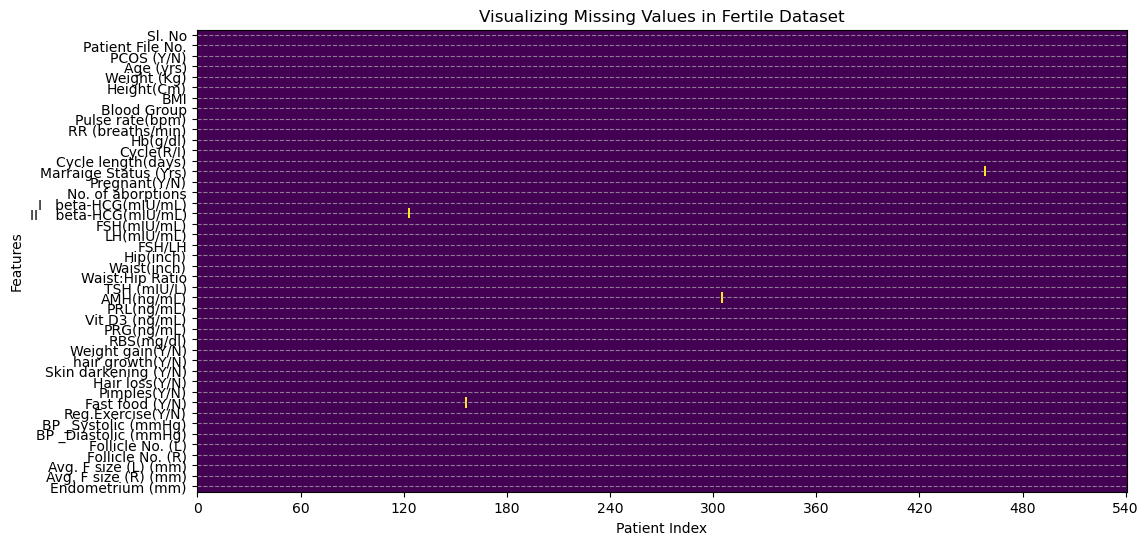

In [14]:
# missingness in data

# The following code is a heatmap showing missing values within each column (taken from code given to students in ICA #2)
numeric_cols = merged_df.select_dtypes(include=[np.number]).columns
merged_df_subset = merged_df[numeric_cols] #all quantitative columns

# create a boolean mask: True for NaN, False for finite values
nan_mask = merged_df_subset.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Patient Index')
plt.ylabel('Features')
plt.title('Visualizing Missing Values in Fertile Dataset')

# y-axis tick labels to feature names
plt.yticks(range(len(merged_df_subset.columns)), merged_df_subset.columns)

# x-axis ticks
num_patients = nan_array.shape[0]
plt.xticks(np.linspace(0, num_patients-1, min(10, num_patients)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

__The fertile data contains 4 patients that have one single missing value for columns labeled Fast Food, II Beta HCG, Marriage, and AMH respectively. Because the first 3 variables are not of interest, this (very small) missingness can be disregarded. Both the infertile and fertile data have a patient (representing row 307 in both tables) with a missing value for AMH. Because this is only 1 patient out of 541, this patient will be disregarded when measuring fertility.__ 

__Now that our missingness is addressed, the data needs to be scaled and the target variable/class needs to be balanced. Checking for balance is crucial.__

In [17]:
merged_df = merged_df.apply(pd.to_numeric, errors='coerce')
merged_df = merged_df.dropna()
from scipy.stats import zscore
true_numeric_cols = ['Age (yrs)', 'Weight (Kg)', 'Height(Cm)', 'BMI', 'Pulse rate(bpm)', 'RR (breaths/min)', 'Hb(g/dl)', 'Cycle length(days)', 
                     'Marraige Status (Yrs)', 'No. of aborptions','I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 
                     'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio', 
                     'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)',
                     'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 
                    'Avg. F size (R) (mm)', 'Endometrium (mm)']
df_scaled = merged_df[true_numeric_cols].apply(zscore)
non_scaled_cols = ['Sl. No', 'Patient File No.', 'PCOS (Y/N)', 'Blood Group', 'Cycle(R/I)', 'Pregnant(Y/N)', 
                   'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
                   'Pimples(Y/N)', 'Fast food (Y/N)', 'Reg.Exercise(Y/N)']
df_final = pd.concat([df_scaled, merged_df[non_scaled_cols]], axis=1)
df_final.head()

,Age (yrs),Weight (Kg),Height(Cm),BMI,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle length(days),Marraige Status (Yrs),No. of aborptions,...,Blood Group,Cycle(R/I),Pregnant(Y/N),Weight gain(Y/N),hair growth(Y/N),Skin darkening (Y/N),Hair loss(Y/N),Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N)
0,-0.636066,-1.368676,-0.744261,-1.243394,1.069503,1.636367,-0.784486,0.041161,-0.144448,-0.418557,...,15,2,0,0,0,0,0,0,1.0,0
1,0.844985,0.482771,0.829694,0.144222,0.168957,0.451297,0.620435,0.041161,0.688057,-0.418557,...,15,2,1,0,0,0,0,0,0.0,0
2,0.289591,0.827648,1.409572,0.230639,-0.281316,-0.733772,0.735592,0.041161,0.479930,-0.418557,...,11,2,1,0,0,0,1,1,1.0,0
3,1.030116,0.482771,-1.406978,1.317029,-0.281316,0.451297,0.965907,0.041161,-0.768827,-0.418557,...,13,2,0,0,0,0,0,0,0.0,0
4,-1.191460,-0.697073,0.746855,-1.055745,-0.281316,-0.733772,-1.337242,0.041161,-1.393205,-0.418557,...,11,2,1,0,0,0,1,0,0.0,0


In [18]:
# counts in fertile data

class_counts = df_final['PCOS (Y/N)'].value_counts() # Retrieves counts for the unique outcomes, which is pcos classification
print(class_counts) # integer object

percentage = (class_counts[1] / class_counts.sum()) * 100 # Retrieves the counts that represent 1/pcos and calculates the percentage of counts for this outcome
print(f"\nPercentage of pcos cases: {percentage:.2f}%") #prints percentage

# code is from HW#5

PCOS (Y/N)
0    362
1    175
Name: count, dtype: int64

Percentage of pcos cases: 32.59%


__PCOS class is not even (about 1/3 yes, 2/3 no), so using SMOTE will help create synthetic values to even out the classes.__

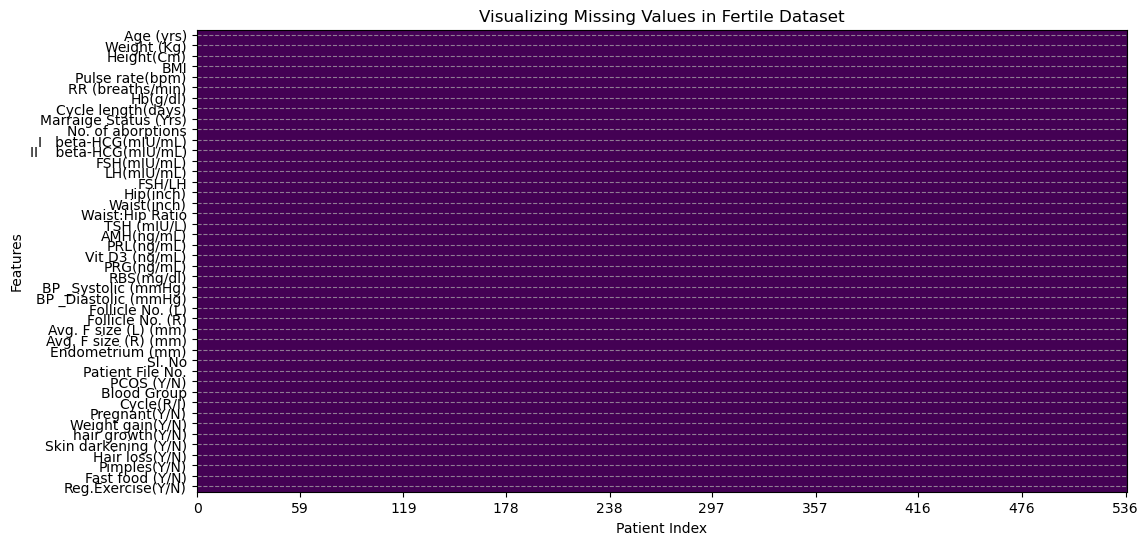

In [20]:
# checking missingness in data is removed

# The following code is a heatmap showing missing values within each column (taken from code given to students in ICA #2)
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
df_final_subset = df_final[numeric_cols] #all quantitative columns

# create a boolean mask: True for NaN, False for finite values
nan_mask = df_final_subset.isna()

# convert boolean mask to integer (False becomes 0, True becomes 1)
nan_array = nan_mask.astype(int).to_numpy()

# size the plot
plt.figure(figsize=(12, 6))

# imshow with interpolation set to 'nearest' and aspect to 'auto'
im = plt.imshow(nan_array.T, interpolation='nearest', aspect='auto', cmap='viridis')

plt.xlabel('Patient Index')
plt.ylabel('Features')
plt.title('Visualizing Missing Values in Fertile Dataset')

# y-axis tick labels to feature names
plt.yticks(range(len(df_final_subset.columns)), df_final_subset.columns)

# x-axis ticks
num_patients = nan_array.shape[0]
plt.xticks(np.linspace(0, num_patients-1, min(10, num_patients)).astype(int))

plt.grid(True, axis='y', linestyle='--', alpha=0.7)

In [21]:

# separate features (X) and target (y)
X = df_final.drop('PCOS (Y/N)', axis=1) # data without 'PCOS (Y/N)' column
y = df_final['PCOS (Y/N)']
y = y.loc[X.index]  # makes sure to only keep rows in y that match X
# corresponding outcome label for each sample in X

# display original class distribution
print("\nOriginal class distribution:")
print(y.value_counts())

# apply SMOTE
smote = SMOTE(random_state=42) # Controls randomness/variability of the algorithms by setting a seed
X_resampled, y_resampled = smote.fit_resample(X, y) # resamples the data and returns the X array containing resampled data and their corresponding labels

# display new class distribution
print("\nClass distribution after SMOTE:")
print(pd.Series(y_resampled).value_counts()) # now equal counts


Original class distribution:
PCOS (Y/N)
0    362
1    175
Name: count, dtype: int64

Class distribution after SMOTE:
PCOS (Y/N)
0    362
1    362
Name: count, dtype: int64


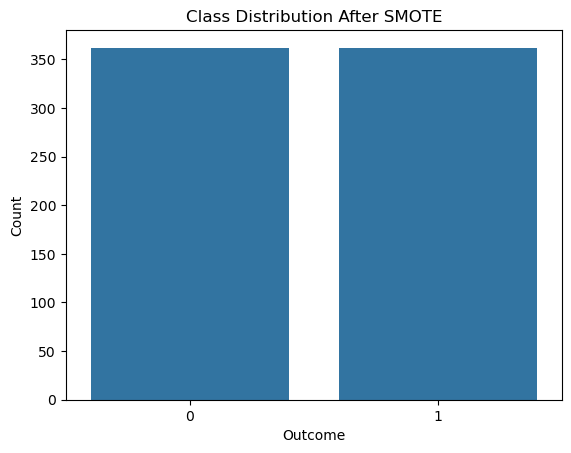

In [22]:
# Bar chart for class distribution after SMOTE
sns.countplot(x=y_resampled)
plt.title('Class Distribution After SMOTE')
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.show()

#confirms its now even

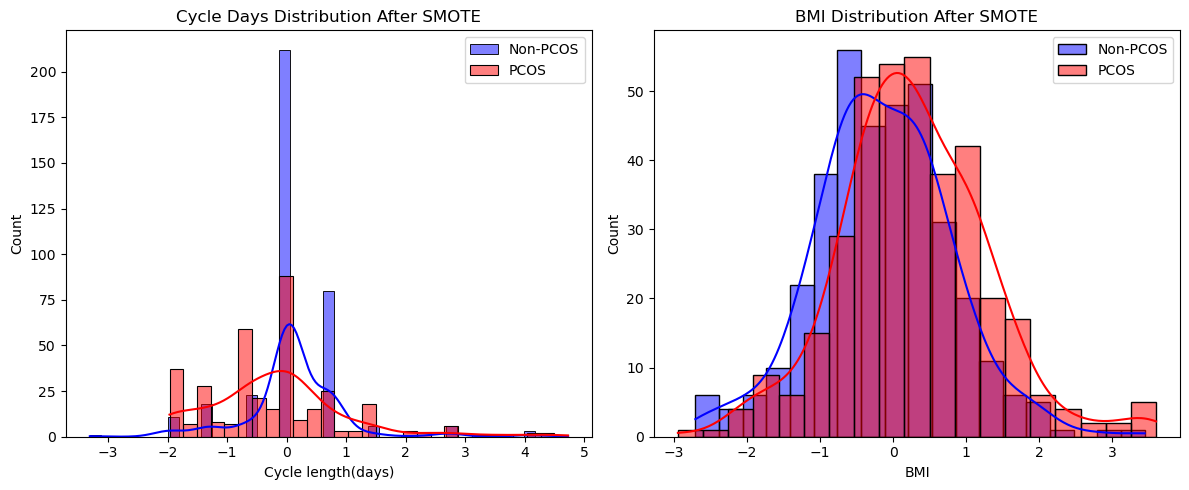

In [23]:
# Distributions

resampled_data = pd.DataFrame(X_resampled, columns=X.columns)
resampled_data['PCOS (Y/N)'] = y_resampled

plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.histplot(resampled_data[resampled_data['PCOS (Y/N)']==0]['Cycle length(days)'], color='blue', label='Non-PCOS', kde=True)
sns.histplot(resampled_data[resampled_data['PCOS (Y/N)']==1]['Cycle length(days)'], color='red', label='PCOS', kde=True)
plt.title('Cycle Days Distribution After SMOTE')
plt.legend()

plt.subplot(1,2,2)
sns.histplot(resampled_data[resampled_data['PCOS (Y/N)']==0]['BMI'], color='blue', label='Non-PCOS', kde=True)
sns.histplot(resampled_data[resampled_data['PCOS (Y/N)']==1]['BMI'], color='red', label='PCOS', kde=True)
plt.title('BMI Distribution After SMOTE')
plt.legend()

plt.tight_layout()
plt.show()

In [24]:
hormone = resampled_data[['Age (yrs)', 'PCOS (Y/N)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 
 'PRG(ng/mL)', 'Pregnant(Y/N)']]
qualityOfLife = resampled_data[['Age (yrs)','PCOS (Y/N)',
 'Pregnant(Y/N)', 'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 'Hair loss(Y/N)', 
                   'Pimples(Y/N)', 'Reg.Exercise(Y/N)']]
metabolic = resampled_data[['Age (yrs)','PCOS (Y/N)', 'BMI', 'Waist:Hip Ratio', 'RBS(mg/dl)',
'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Pregnant(Y/N)', 'Reg.Exercise(Y/N)', 'Weight gain(Y/N)', 'Skin darkening (Y/N)']]
fertility = resampled_data[['Age (yrs)', 'PCOS (Y/N)', 'Cycle length(days)', 
'Follicle No. (L)', 'Follicle No. (R)', 'Avg. F size (L) (mm)', 
                    'Avg. F size (R) (mm)', 'Endometrium (mm)', 'Pregnant(Y/N)', ]]

### Distributions:

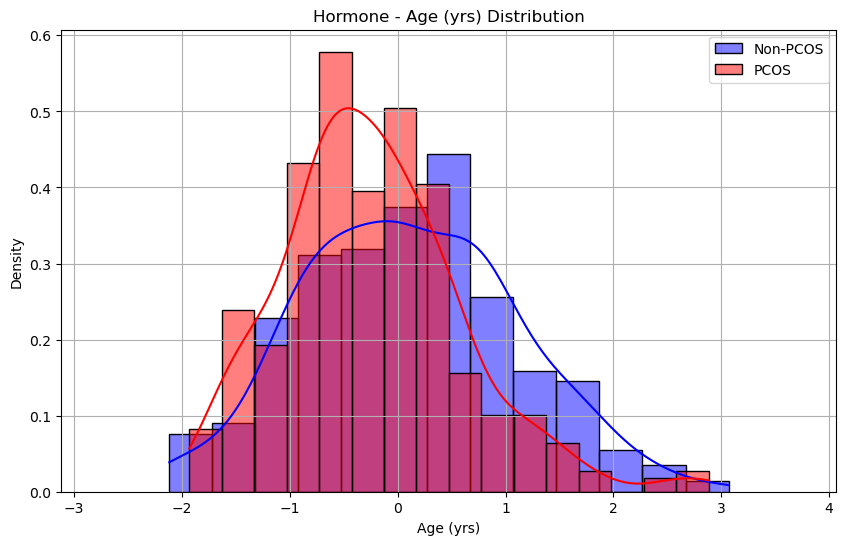

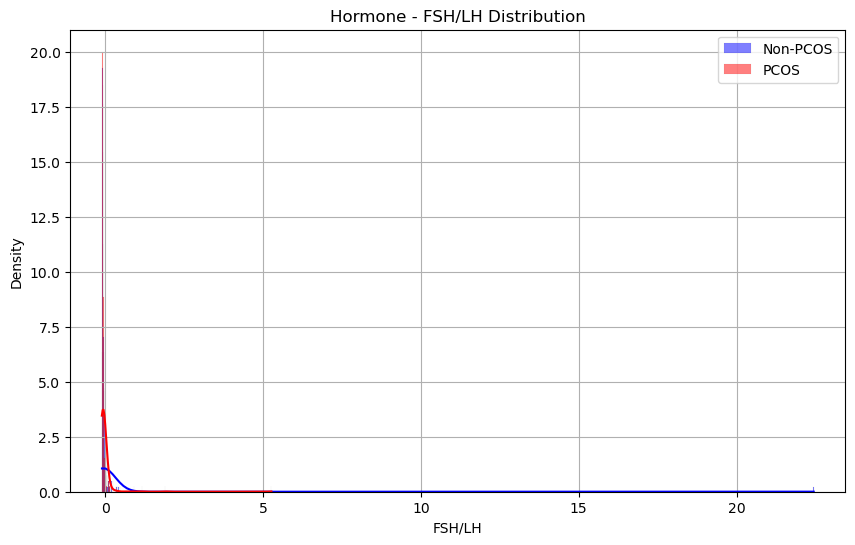

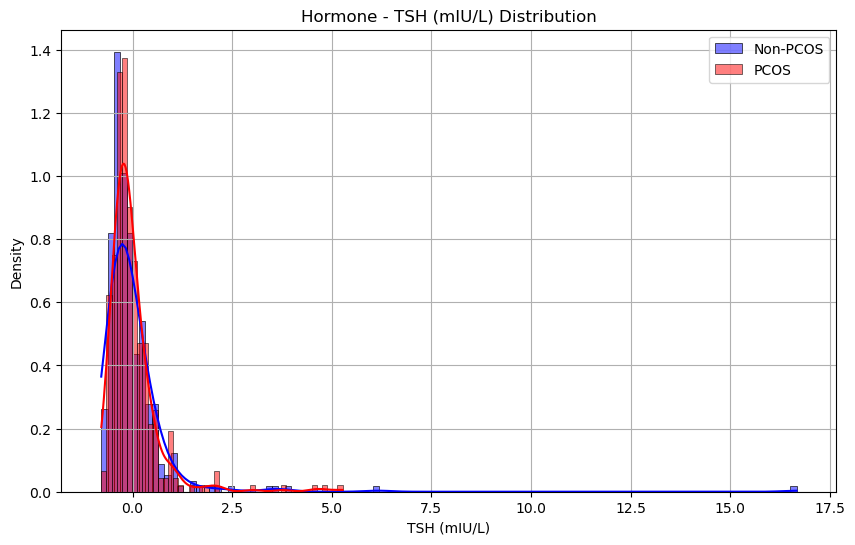

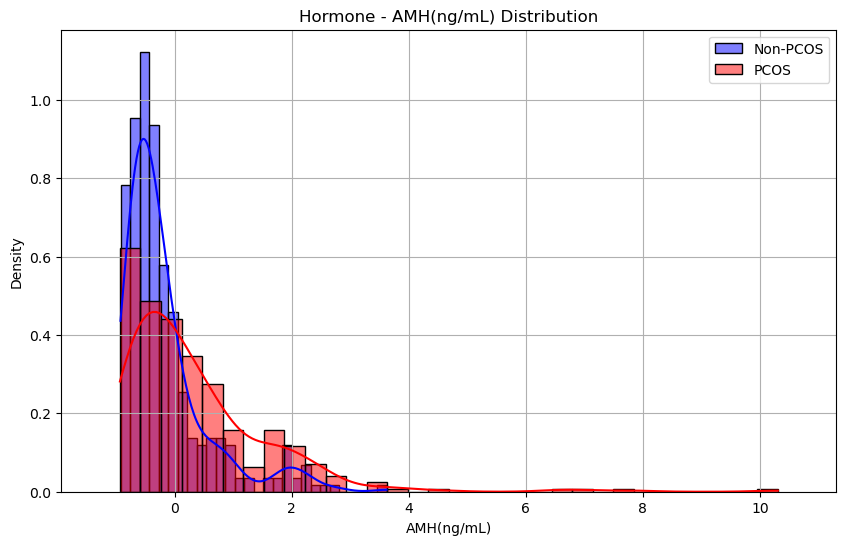

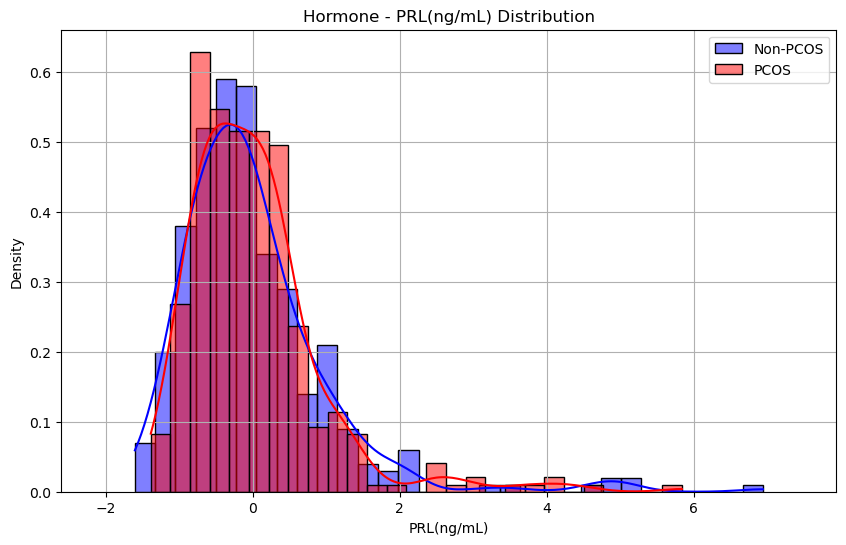

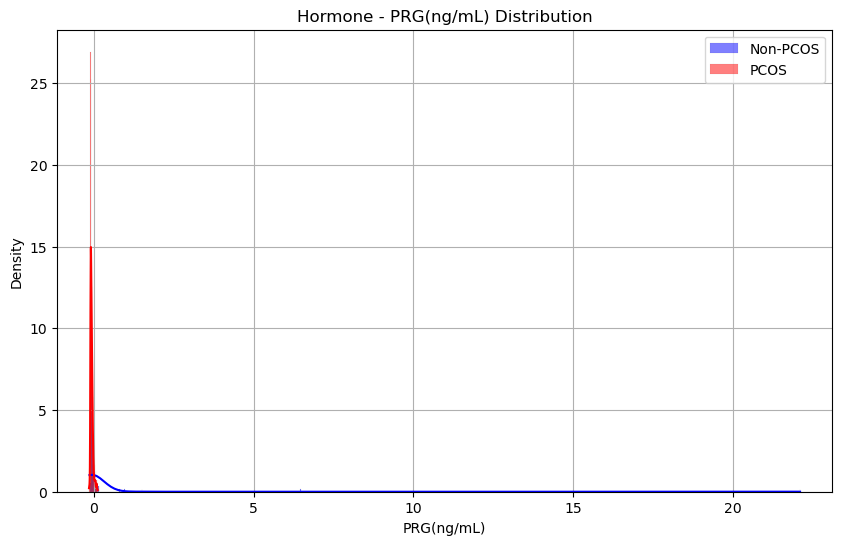

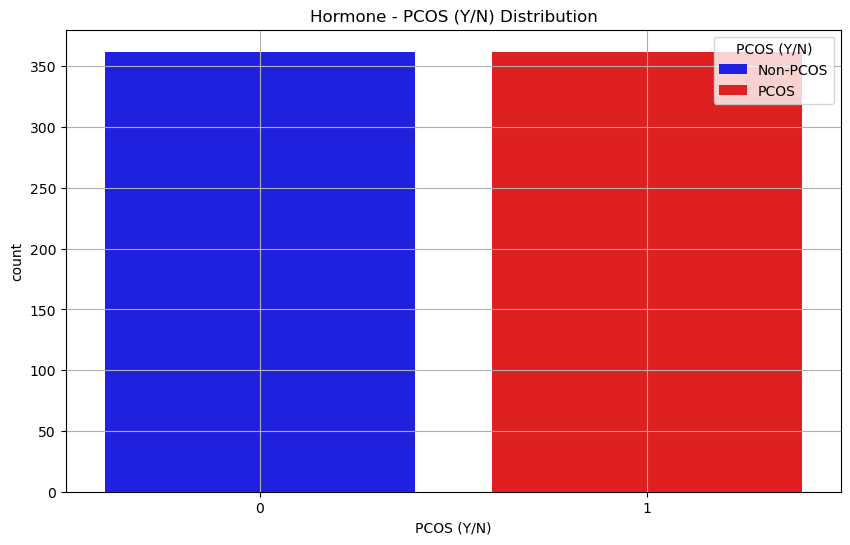

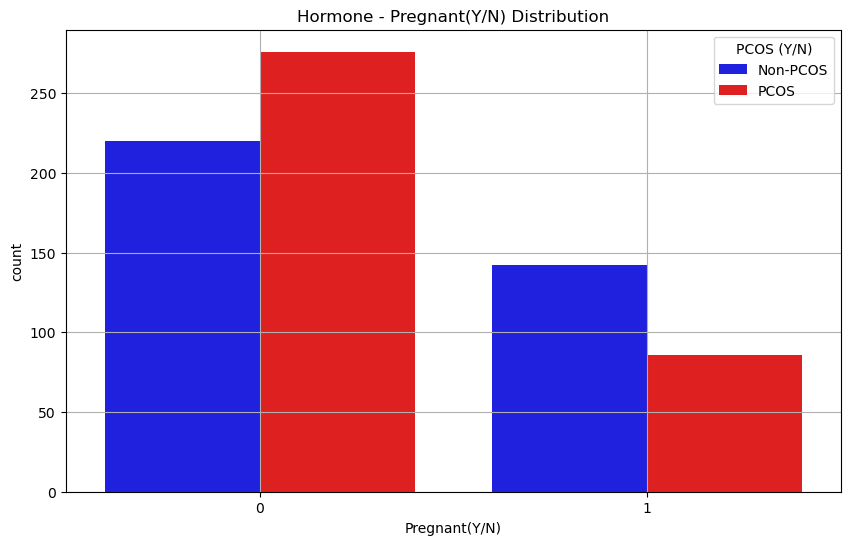

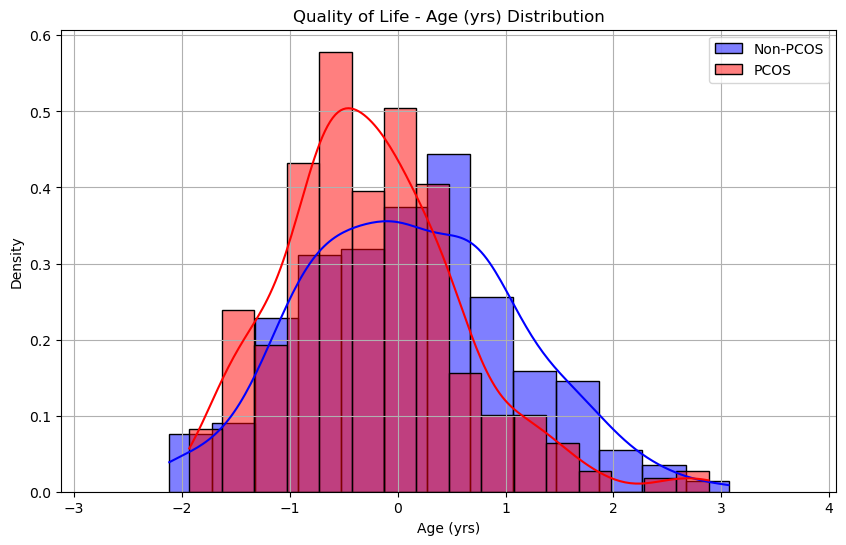

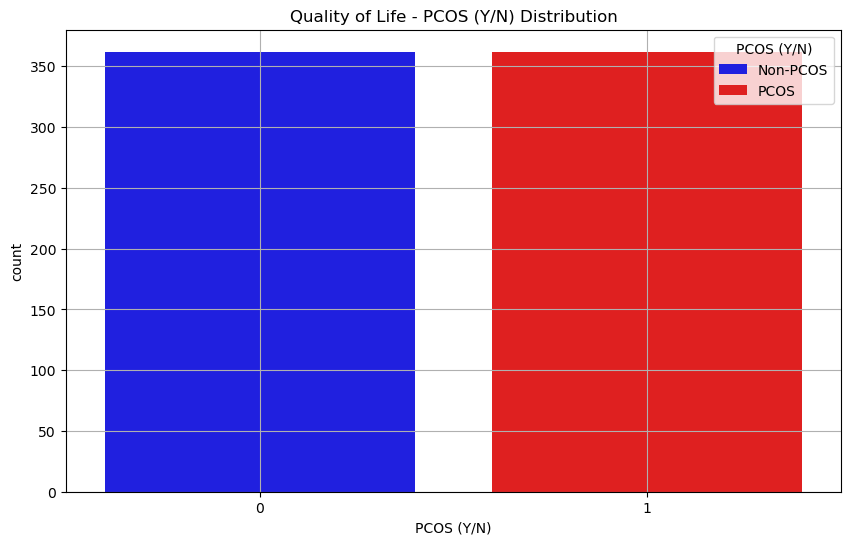

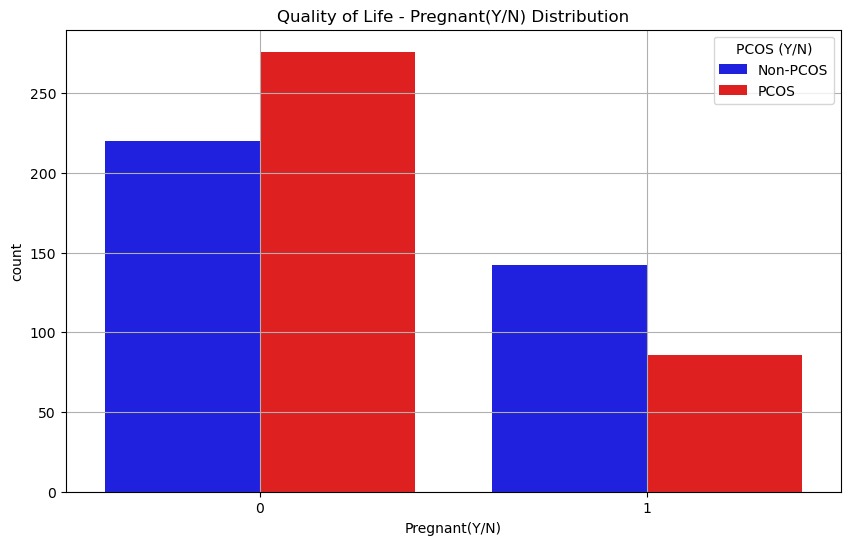

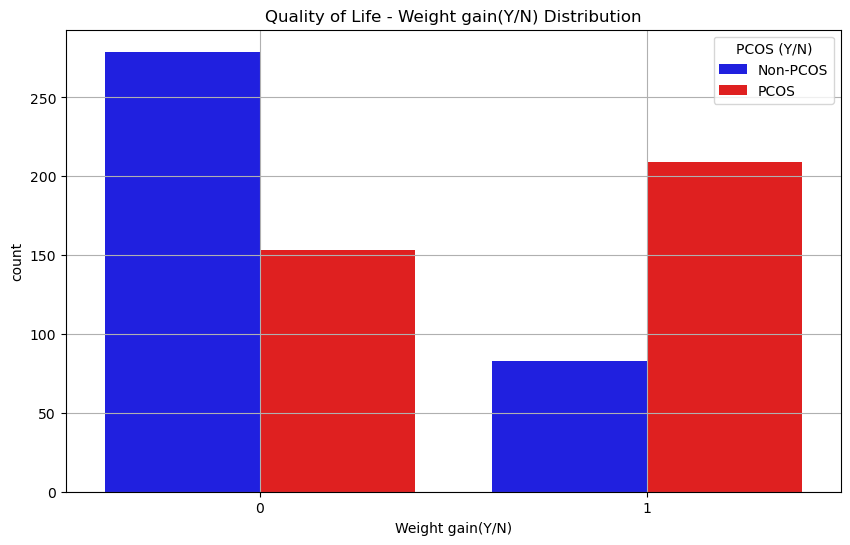

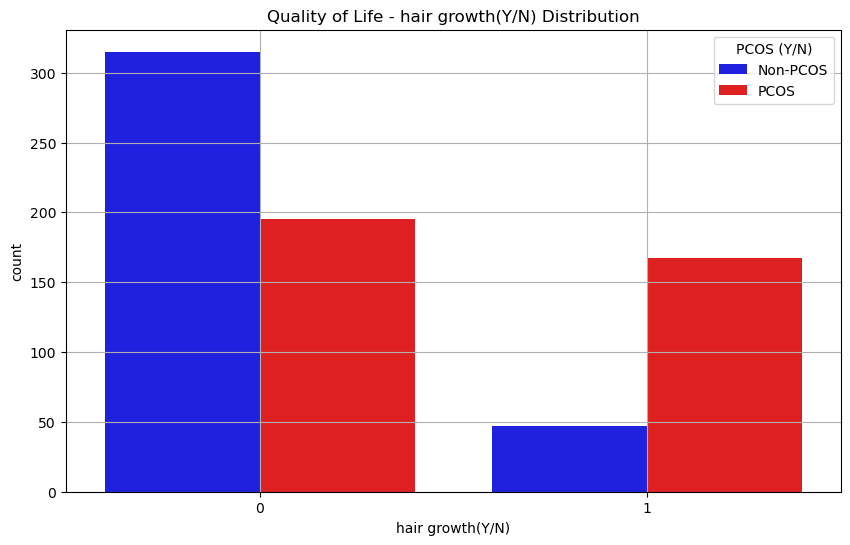

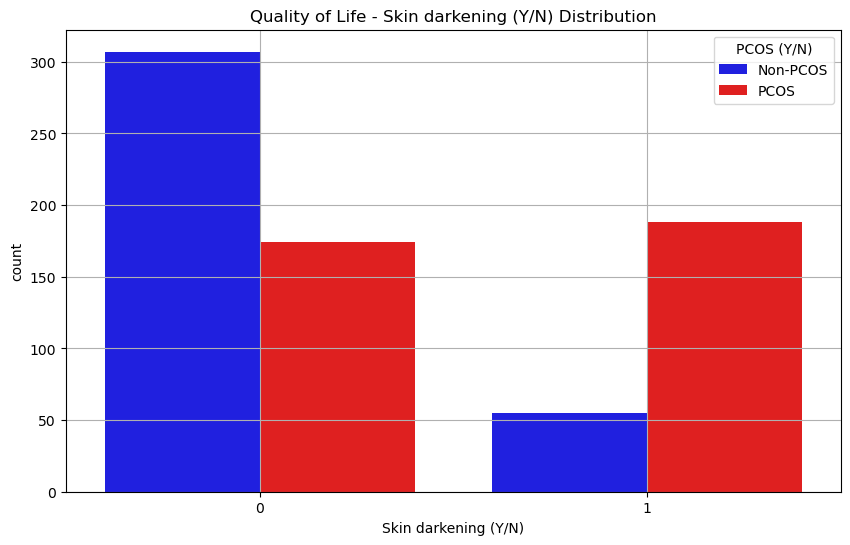

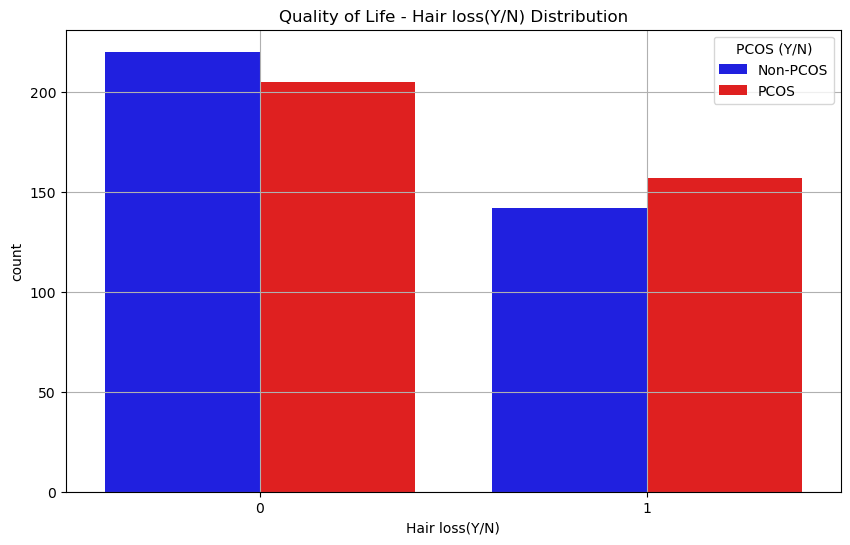

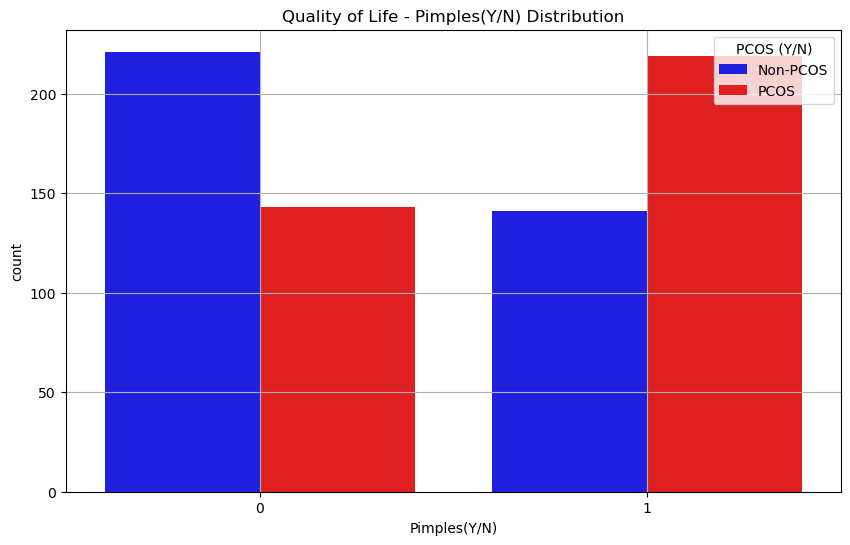

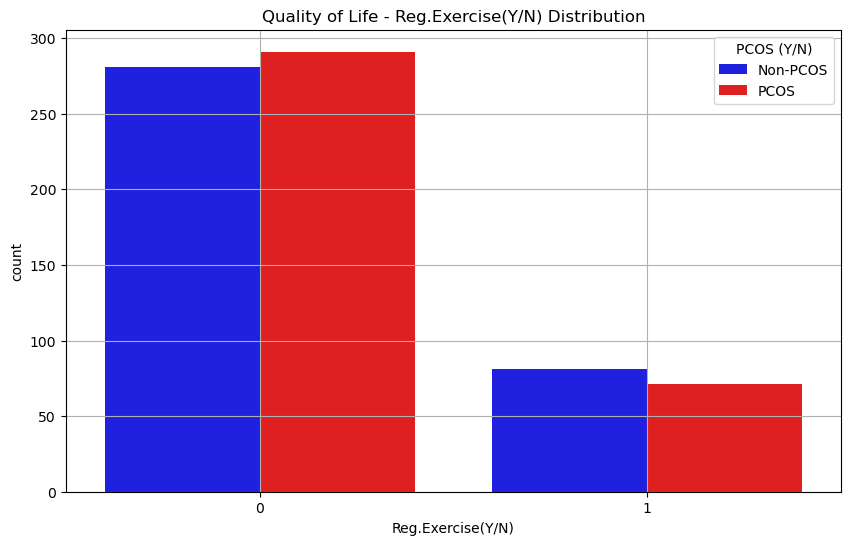

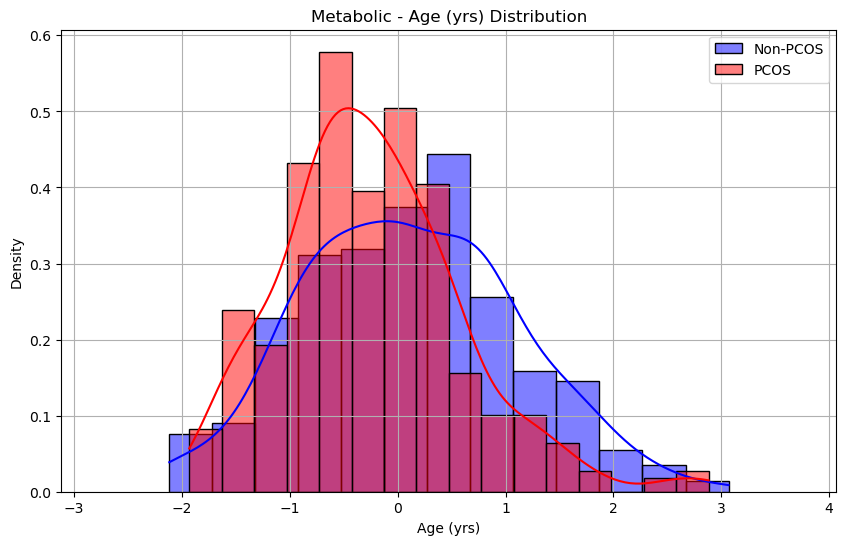

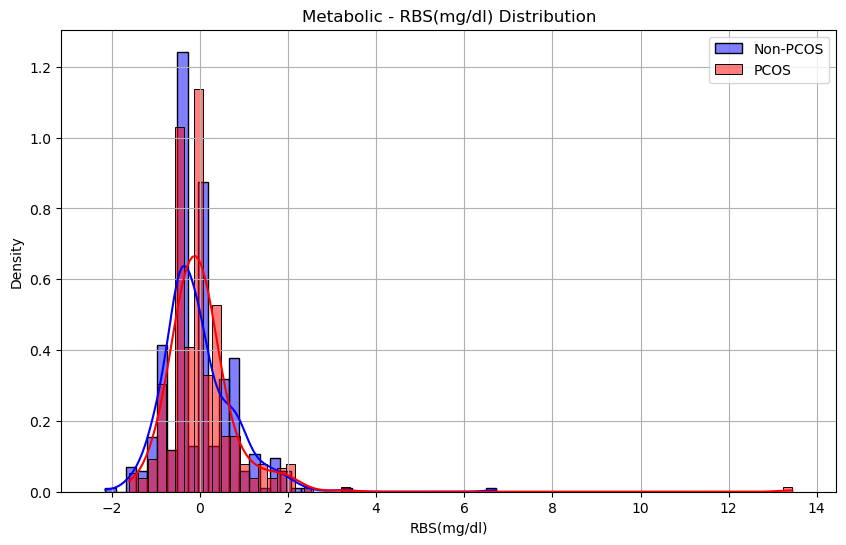

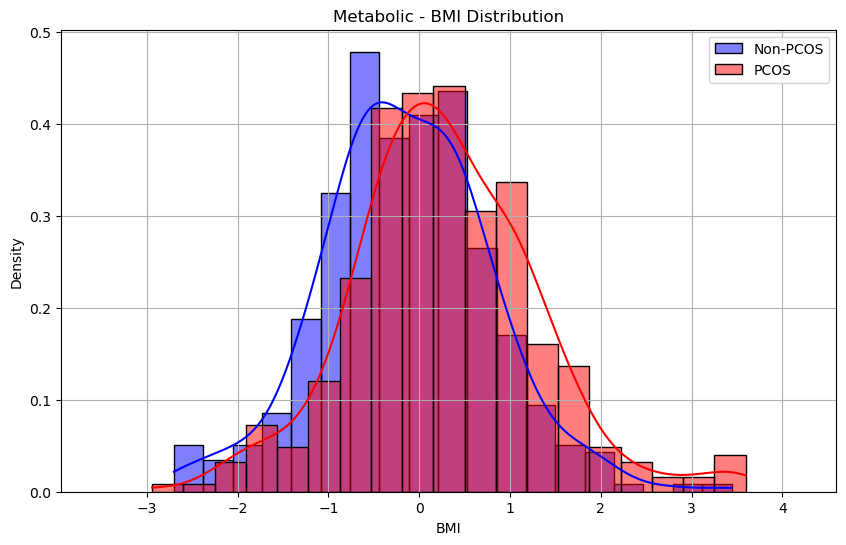

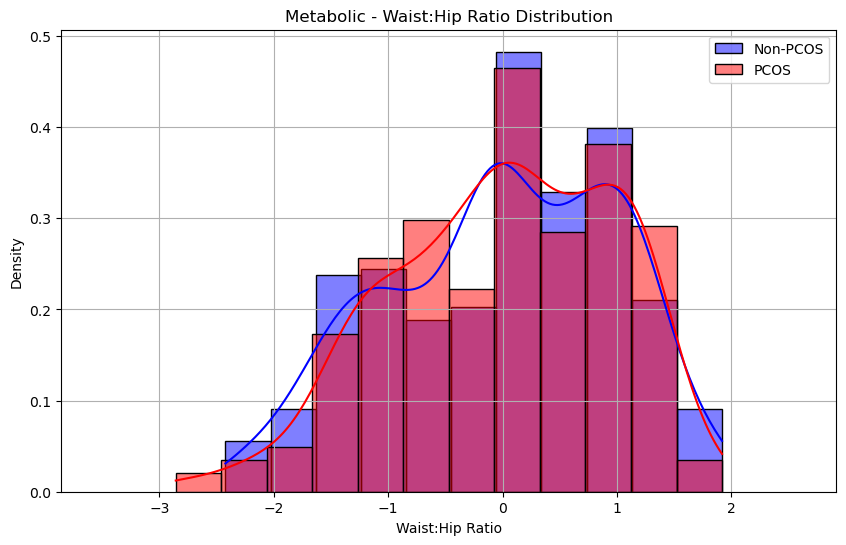

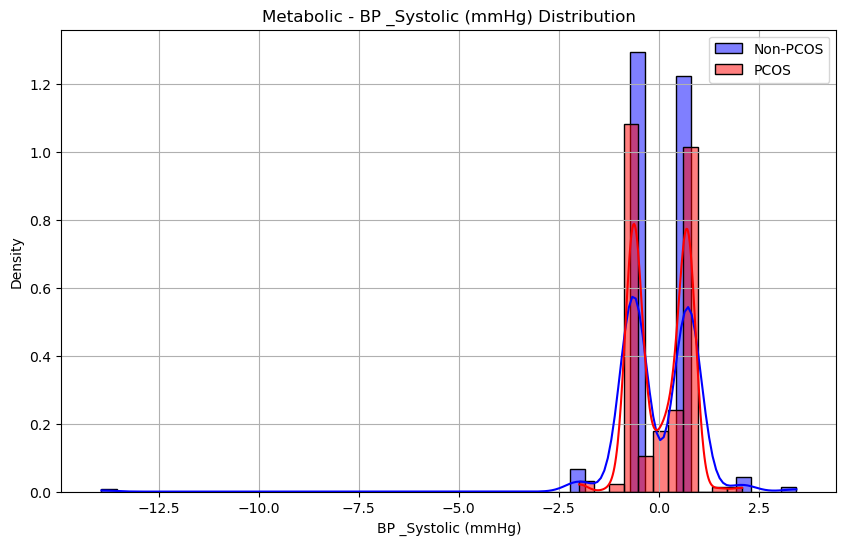

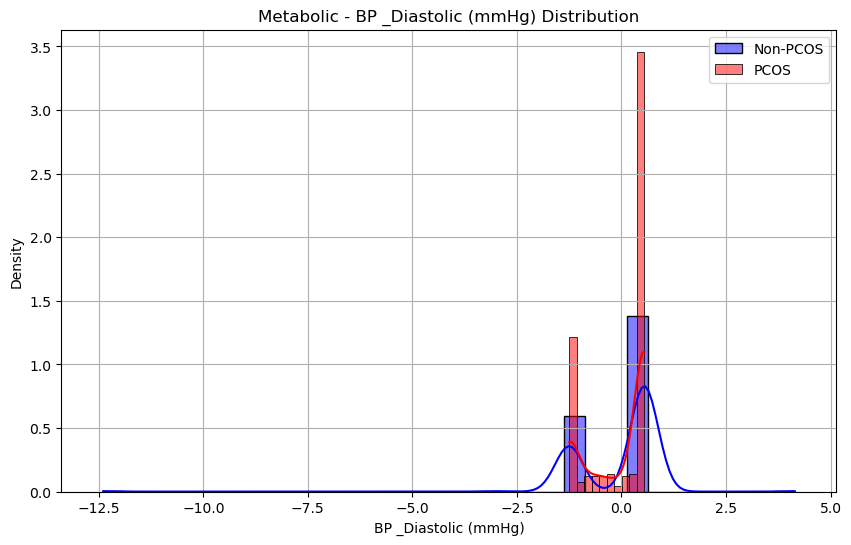

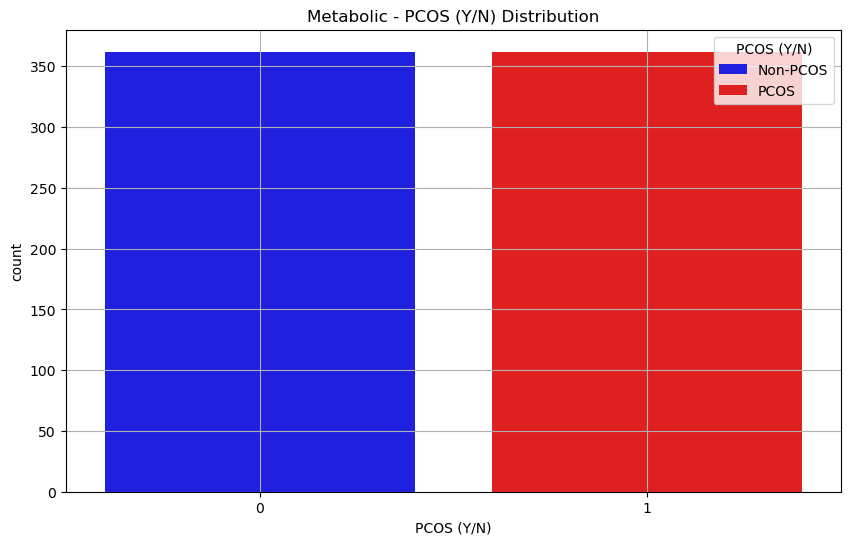

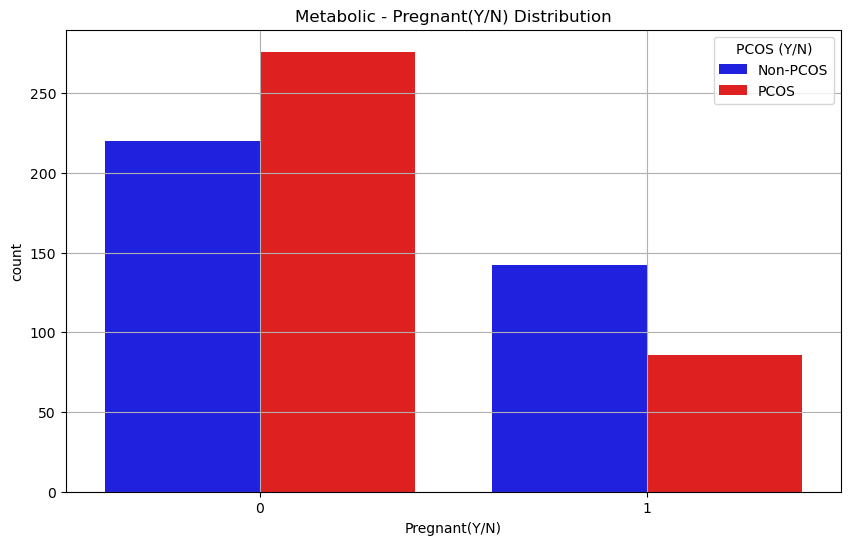

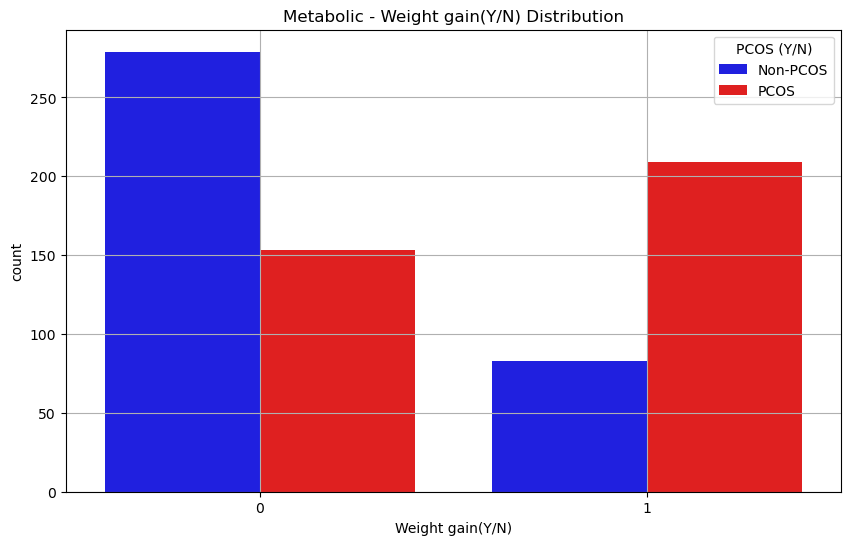

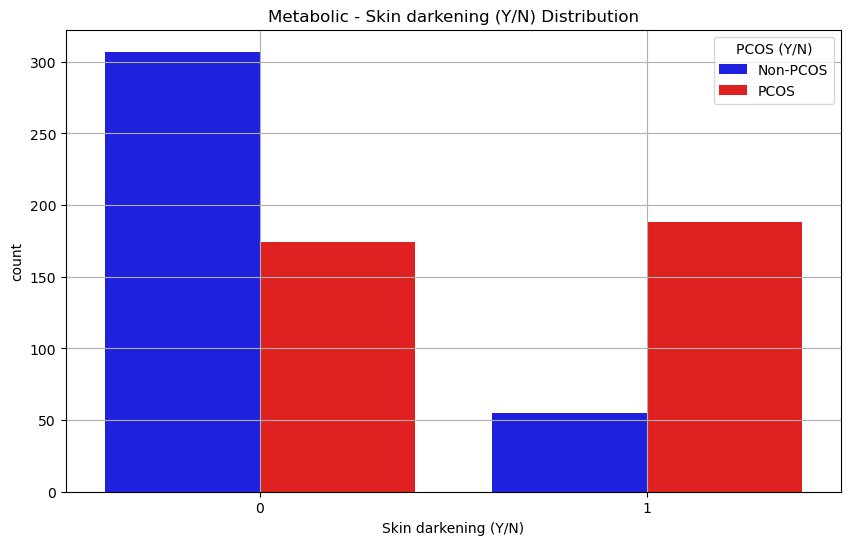

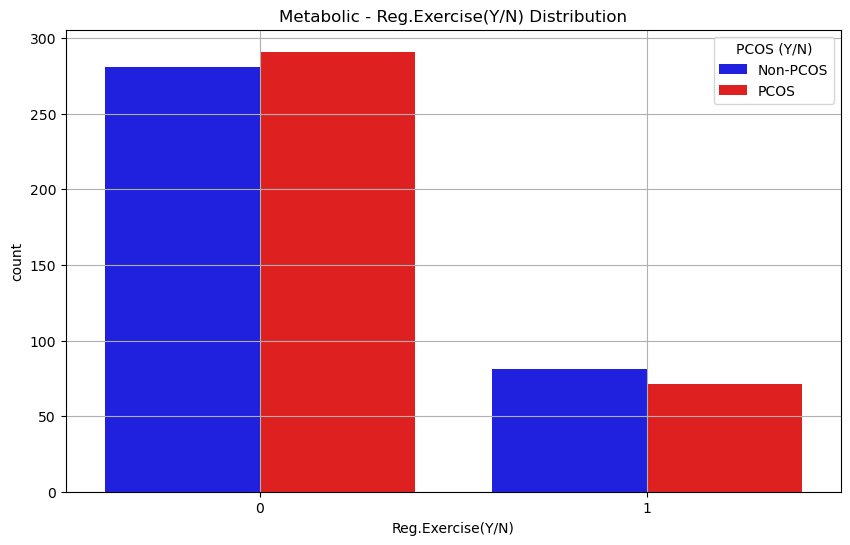

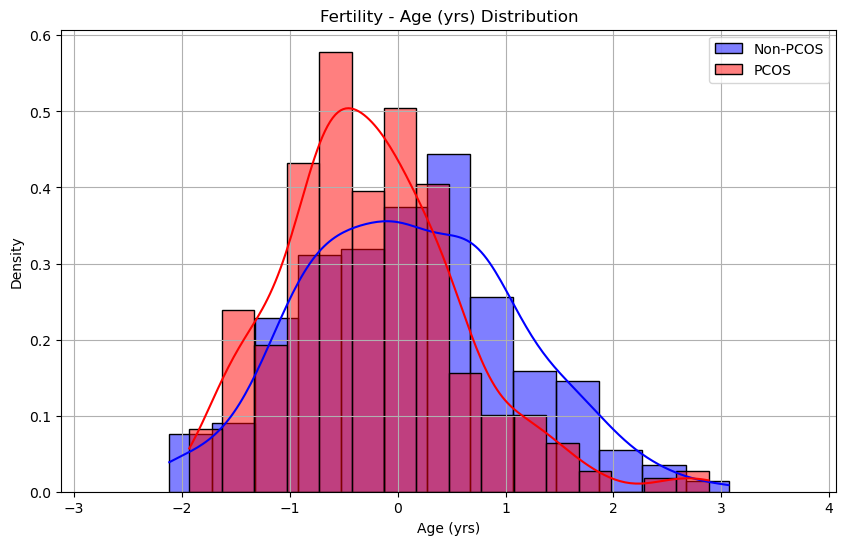

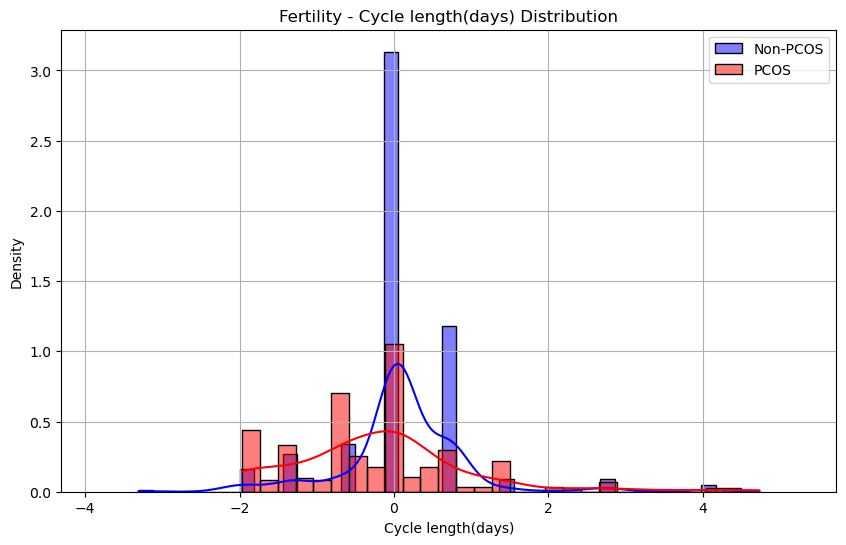

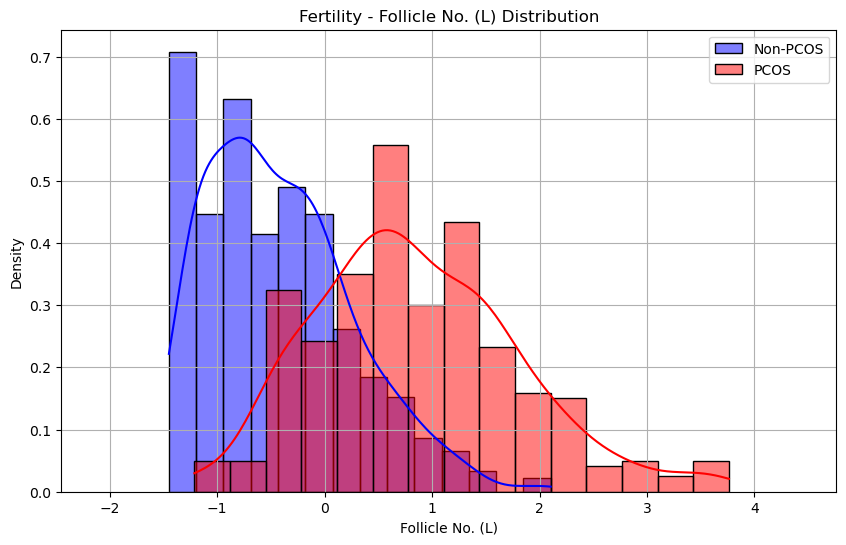

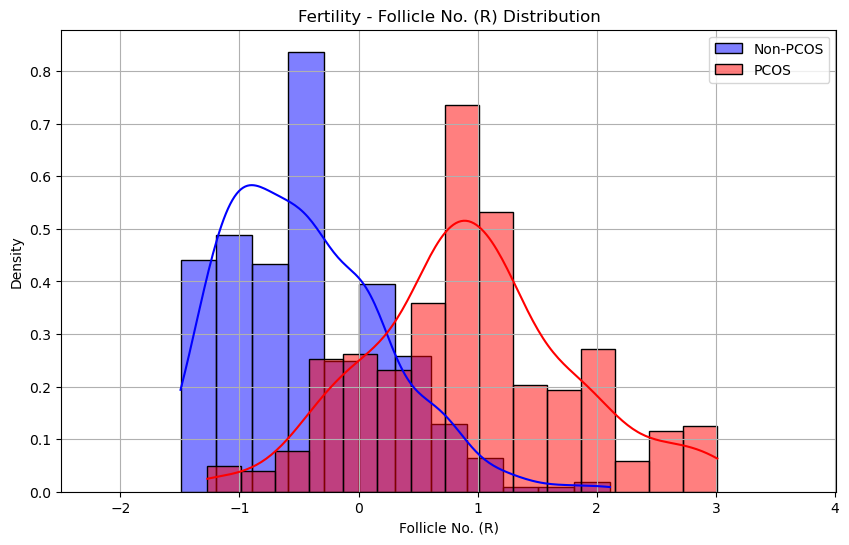

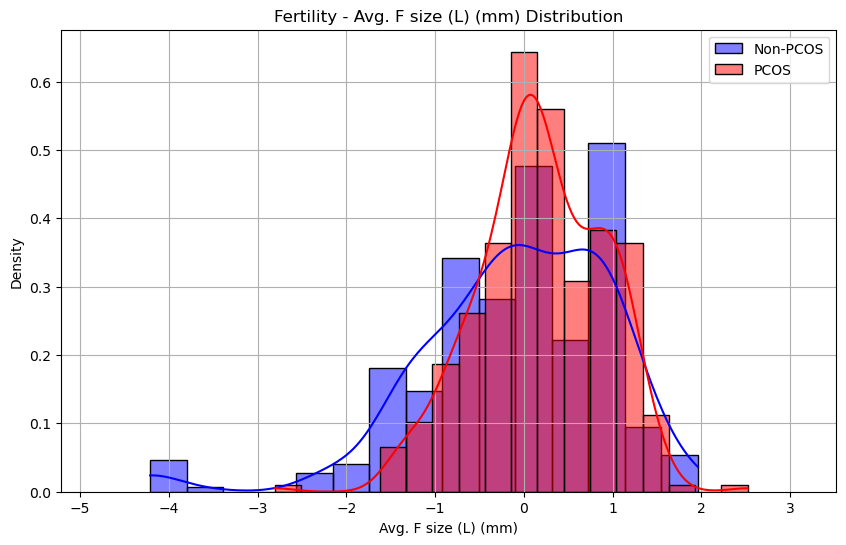

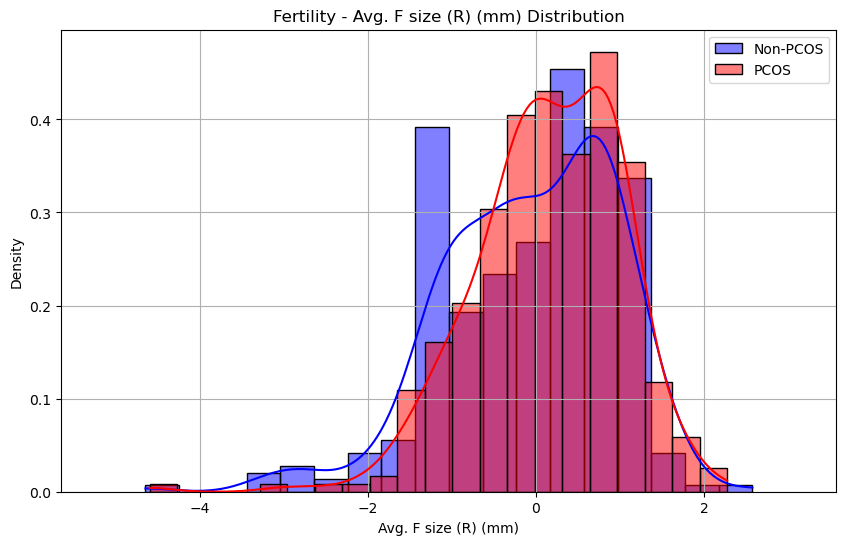

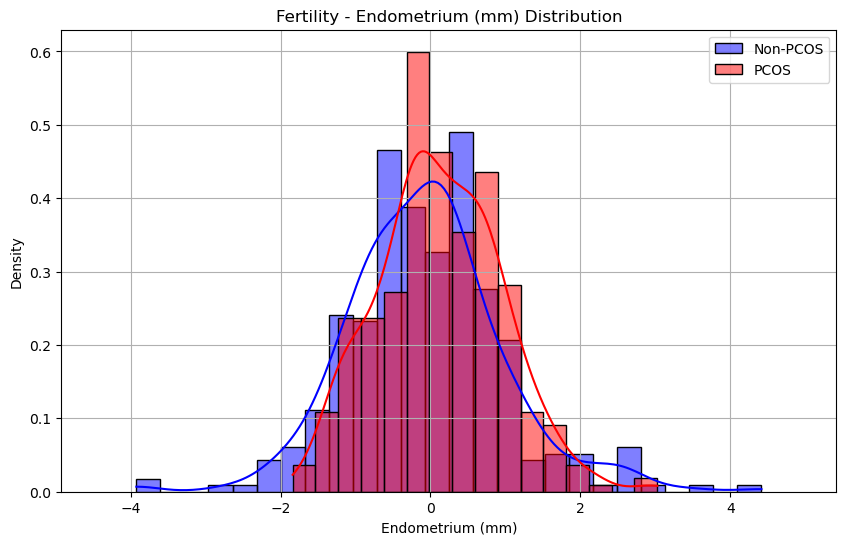

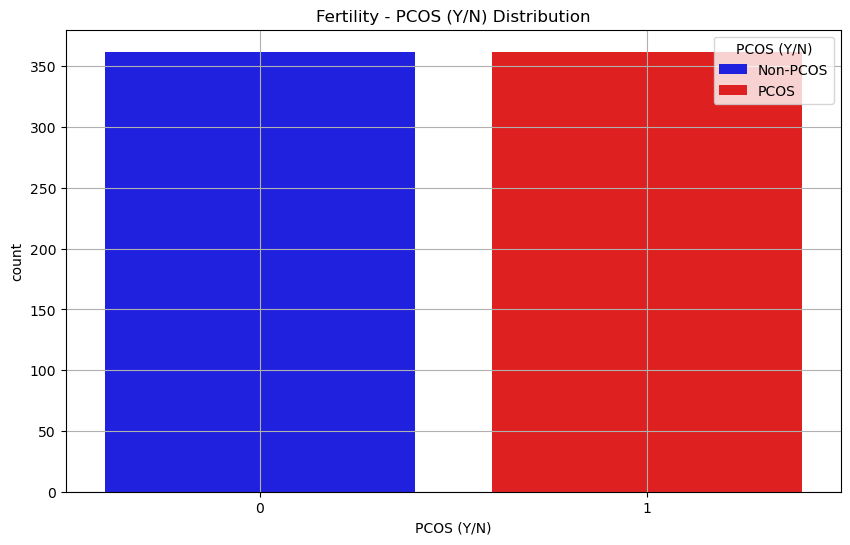

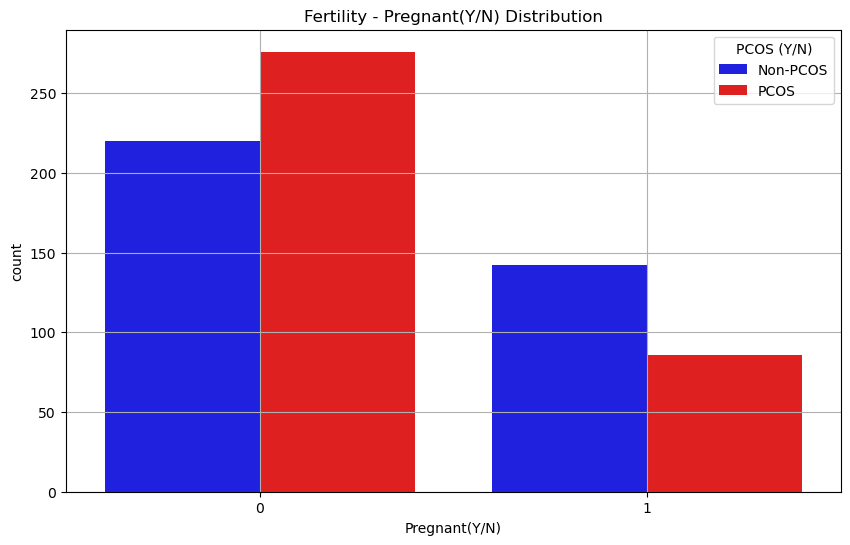

In [26]:
numeric_columns = [
    'Age (yrs)', 'FSH(mIU/mL)', 'LH(mIU/mL)', 'FSH/LH', 'TSH (mIU/L)', 'AMH(ng/mL)', 
    'PRL(ng/mL)', 'PRG(ng/mL)', 'RBS(mg/dl)', 'BMI', 
    'Waist:Hip Ratio', 'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 
    'Cycle length(days)', 'Follicle No. (L)', 
    'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 
    'Endometrium (mm)'
]

categorical_columns = [
    'PCOS (Y/N)', 'Pregnant(Y/N)', 
    'Weight gain(Y/N)', 'hair growth(Y/N)', 'Skin darkening (Y/N)', 
    'Hair loss(Y/N)', 'Pimples(Y/N)', 
    'Reg.Exercise(Y/N)'
]

# Loop through each subset and create plots
subsets = {
    'Hormone': hormone,
    'Quality of Life': qualityOfLife,
    'Metabolic': metabolic,
    'Fertility': fertility
}

for title, subset in subsets.items():
    # Plot numeric columns as histograms
    for col in numeric_columns:
        if col in subset.columns and not subset[subset['PCOS (Y/N)'] == 0][col].empty:
            plt.figure(figsize=(10, 6))
            sns.histplot(subset[subset['PCOS (Y/N)'] == 0][col], bins='auto', color='blue', 
                         alpha=0.5, label='Non-PCOS', kde=True, stat='density')
            sns.histplot(subset[subset['PCOS (Y/N)'] == 1][col], bins='auto', color='red', 
                         alpha=0.5, label='PCOS', kde=True, stat='density')
            plt.title(f'{title} - {col} Distribution')
            plt.legend()
            plt.xlim(subset[col].min() - 1, subset[col].max() + 1)  # Set x-axis limits
            plt.grid()
            plt.show()

    # Plot categorical columns as bar plots (optional to remove if not needed)
    for col in categorical_columns:
        if col in subset.columns and not subset[col].empty:
            plt.figure(figsize=(10, 6))
            sns.countplot(data=subset, x=col, hue='PCOS (Y/N)', palette=["blue", "red"])
            plt.title(f'{title} - {col} Distribution')
            plt.legend(title='PCOS (Y/N)', loc='upper right', labels=['Non-PCOS', 'PCOS'])
            plt.grid()
            plt.show()

### Correlation Matrix for each subset


--- Hormone Correlation with PCOS (Y/N) ---
Age (yrs): -0.19
AMH(ng/mL): 0.24
Pregnant(Y/N): -0.17

--- Other Hormone Variable Correlations ---
AMH(ng/mL) and Age (yrs): -0.19


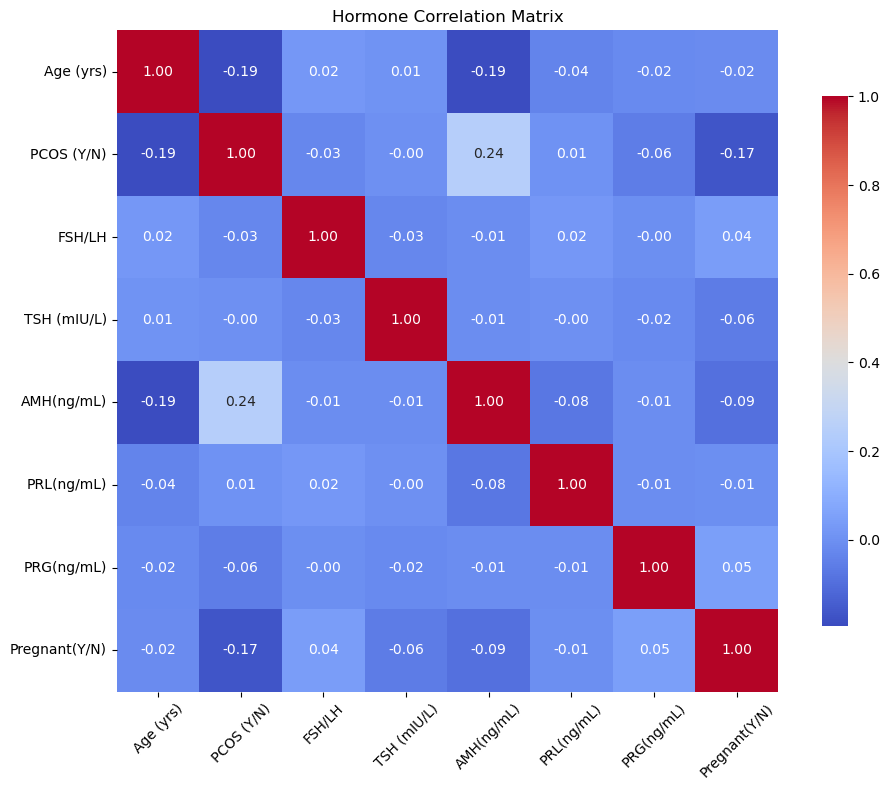


--- Quality of Life Correlation with PCOS (Y/N) ---
Age (yrs): -0.19
Pregnant(Y/N): -0.17
Weight gain(Y/N): 0.35
hair growth(Y/N): 0.36
Skin darkening (Y/N): 0.39
Pimples(Y/N): 0.22

--- Other Quality of Life Variable Correlations ---
hair growth(Y/N) and Weight gain(Y/N): 0.24
Skin darkening (Y/N) and Weight gain(Y/N): 0.30
Skin darkening (Y/N) and hair growth(Y/N): 0.33
Hair loss(Y/N) and Weight gain(Y/N): 0.24
Hair loss(Y/N) and hair growth(Y/N): 0.21
Pimples(Y/N) and Weight gain(Y/N): 0.21


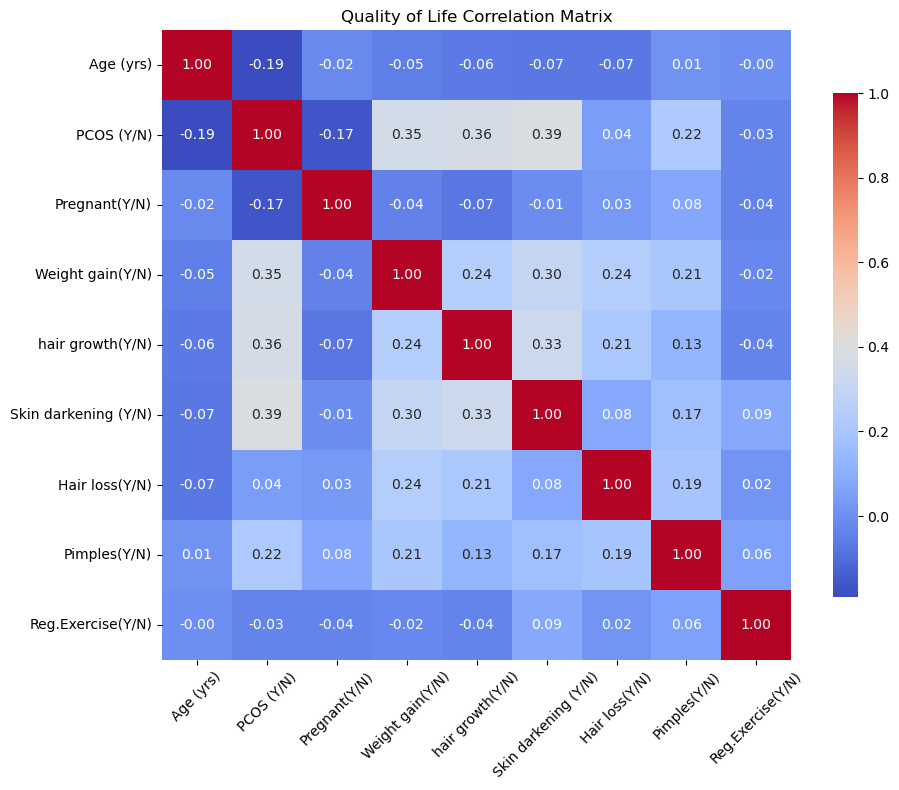


--- Metabolic Correlation with PCOS (Y/N) ---
Age (yrs): -0.19
BMI: 0.21
Pregnant(Y/N): -0.17
Weight gain(Y/N): 0.35
Skin darkening (Y/N): 0.39

--- Other Metabolic Variable Correlations ---
Pregnant(Y/N) and BMI: -0.11
Reg.Exercise(Y/N) and Waist:Hip Ratio: -0.12
Weight gain(Y/N) and BMI: 0.46
Skin darkening (Y/N) and Weight gain(Y/N): 0.30


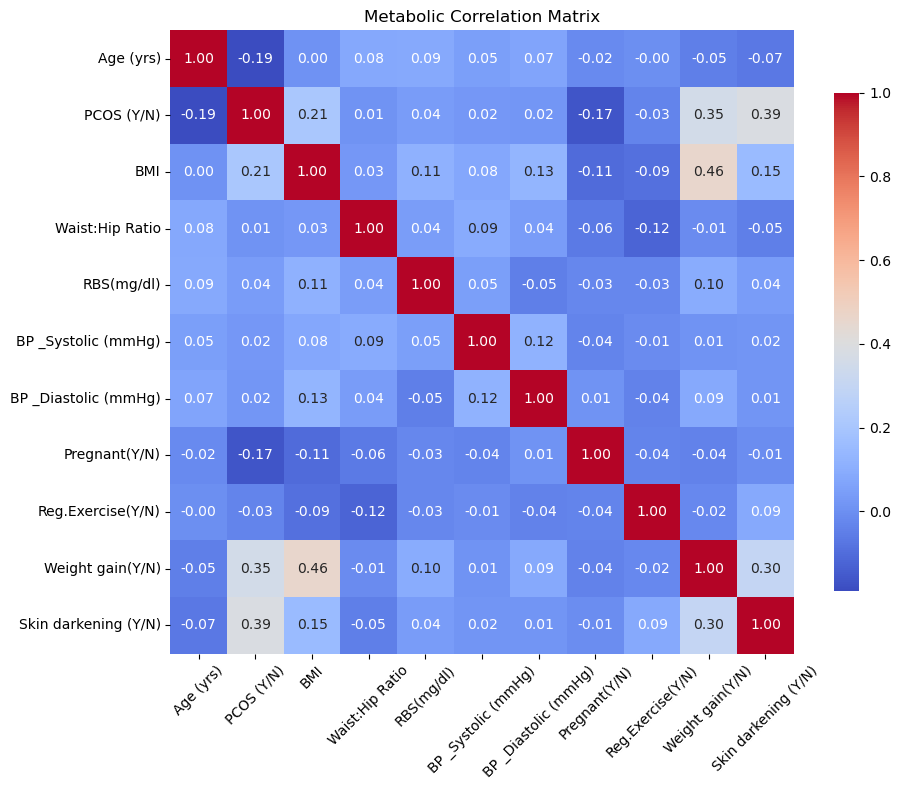


--- Fertility Correlation with PCOS (Y/N) ---
Age (yrs): -0.19
Cycle length(days): -0.15
Follicle No. (L): 0.61
Follicle No. (R): 0.67
Pregnant(Y/N): -0.17

--- Other Fertility Variable Correlations ---
Follicle No. (L) and Age (yrs): -0.13
Follicle No. (R) and Age (yrs): -0.16
Follicle No. (R) and Cycle length(days): -0.14
Follicle No. (R) and Follicle No. (L): 0.80
Avg. F size (L) (mm) and Follicle No. (L): 0.25
Avg. F size (R) (mm) and Follicle No. (R): 0.20
Avg. F size (R) (mm) and Avg. F size (L) (mm): 0.53
Pregnant(Y/N) and Avg. F size (L) (mm): -0.12
Pregnant(Y/N) and Avg. F size (R) (mm): -0.12


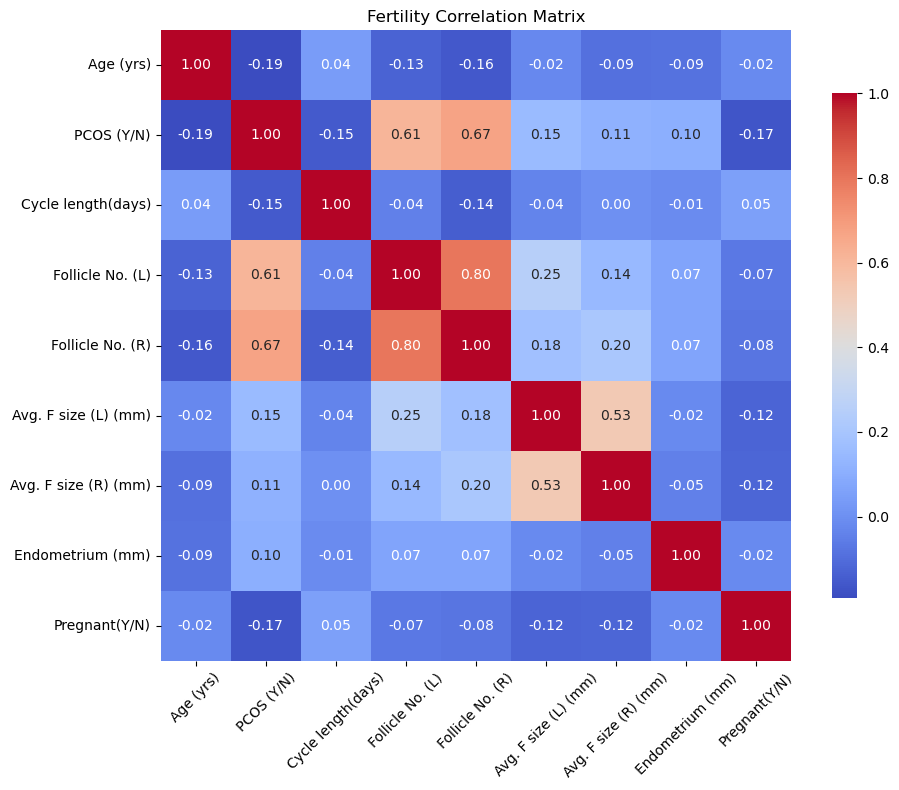

In [28]:
for title, subset in subsets.items():
    # Calculate the correlation matrix
    corr_matrix = subset.corr()

    # 1. Print variables correlated with PCOS
    print(f"\n--- {title} Correlation with PCOS (Y/N) ---")
    pc_correlations = corr_matrix['PCOS (Y/N)']
    for variable, value in pc_correlations.items():
        if variable != 'PCOS (Y/N)' and (value > 0.2 or value < -0.1):
            print(f"{variable}: {value:.2f}")

    # 2. Print other variable correlations (excluding PCOS correlations)
    print(f"\n--- Other {title} Variable Correlations ---")
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] > 0.2 or corr_matrix.iloc[i, j] < -0.1) and \
                    (corr_matrix.columns[i] != 'PCOS (Y/N)' and corr_matrix.columns[j] != 'PCOS (Y/N)'):
                print(f"{corr_matrix.columns[i]} and {corr_matrix.columns[j]}: {corr_matrix.iloc[i, j]:.2f}")

    # Create a heatmap for the correlation matrix
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})
    plt.title(f'{title} Correlation Matrix')
    plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.tight_layout()  # Adjust layout to prevent clipping
    plt.show()

### Box Plots

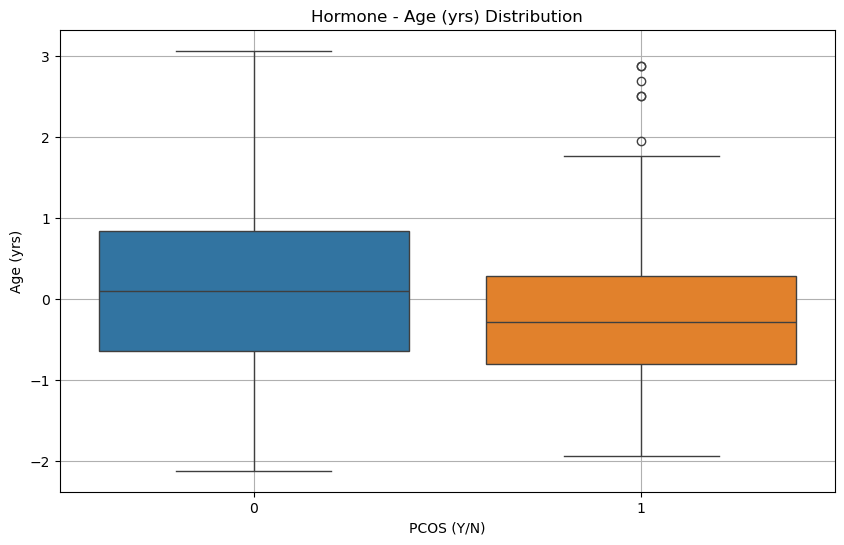

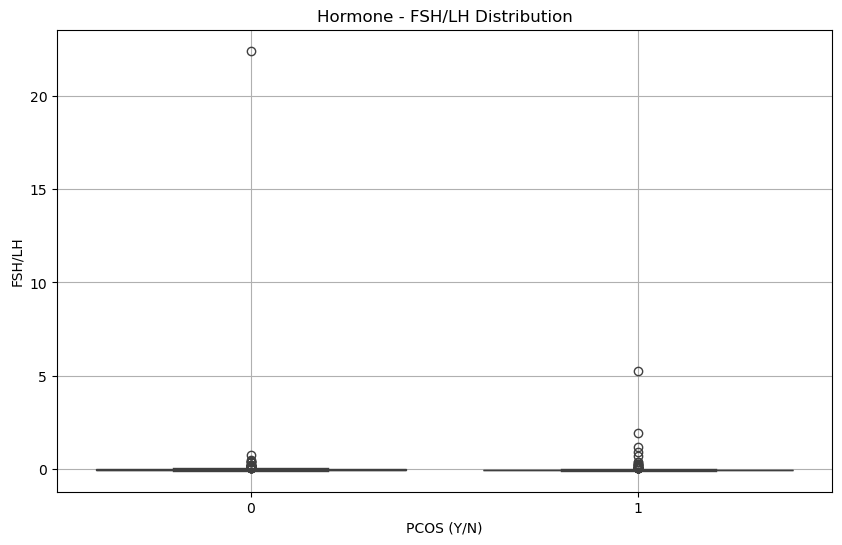

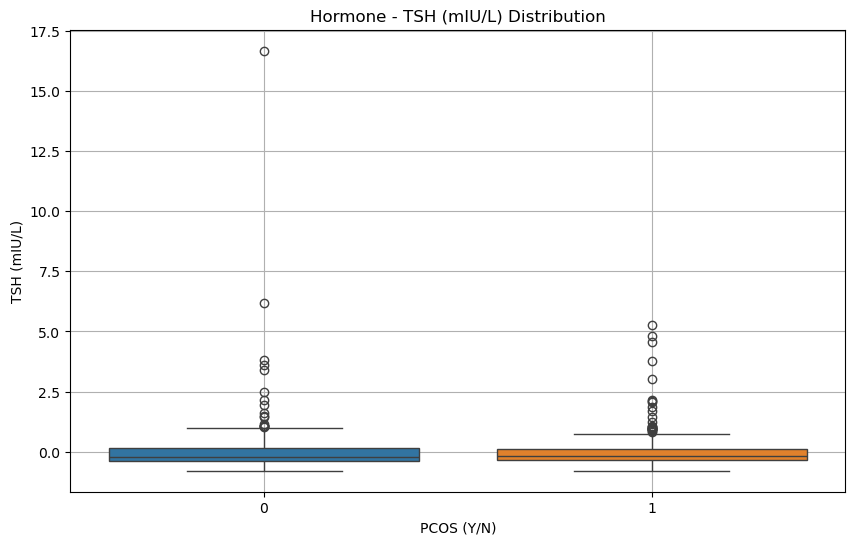

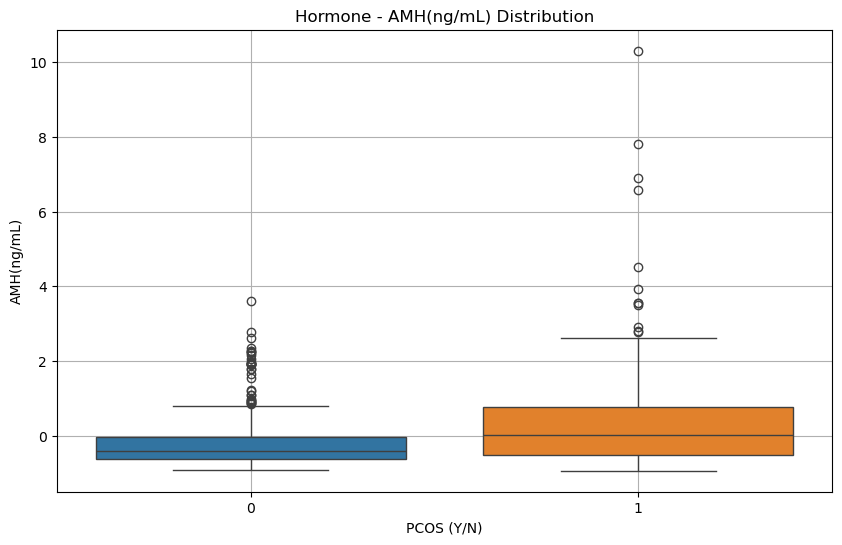

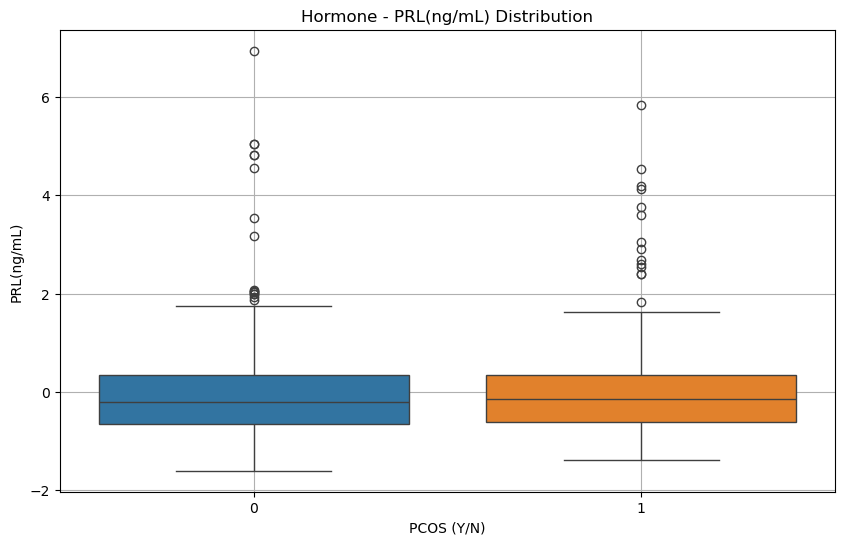

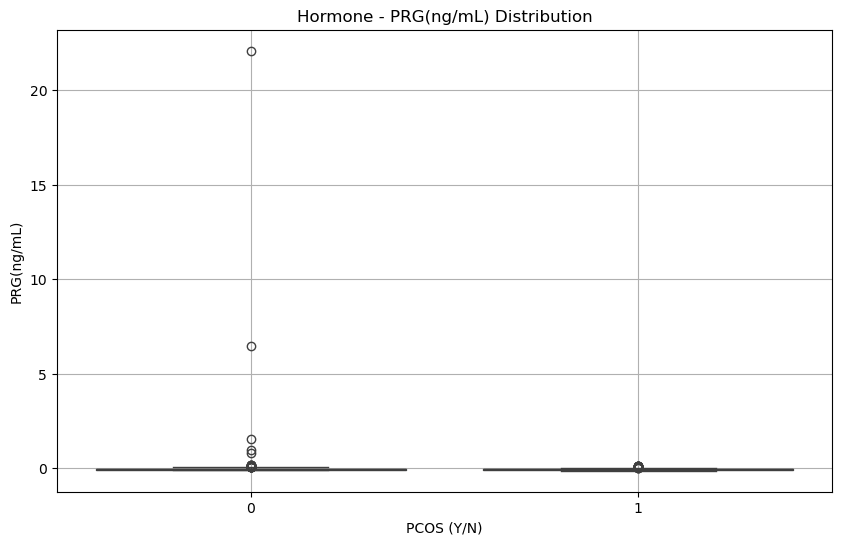

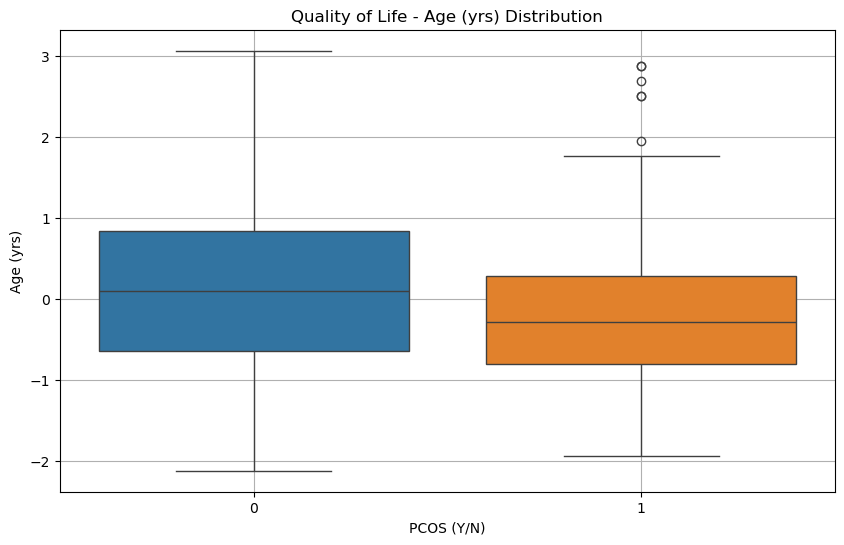

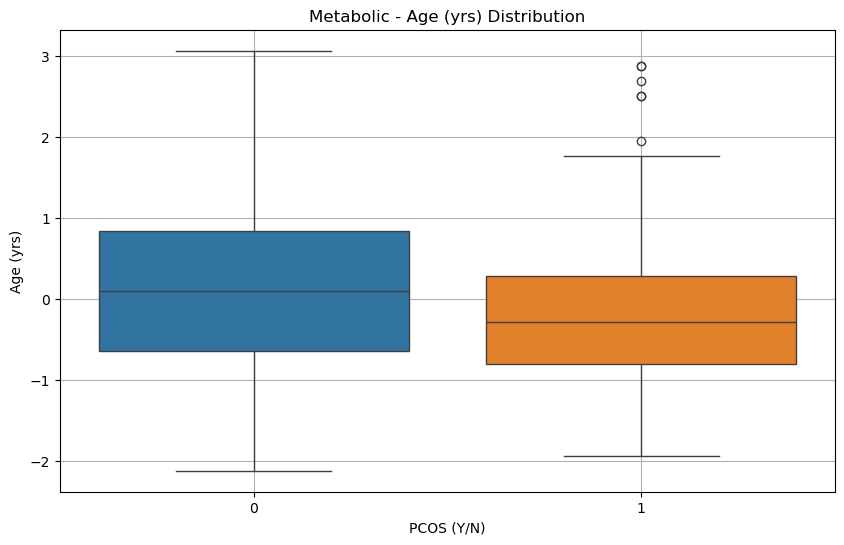

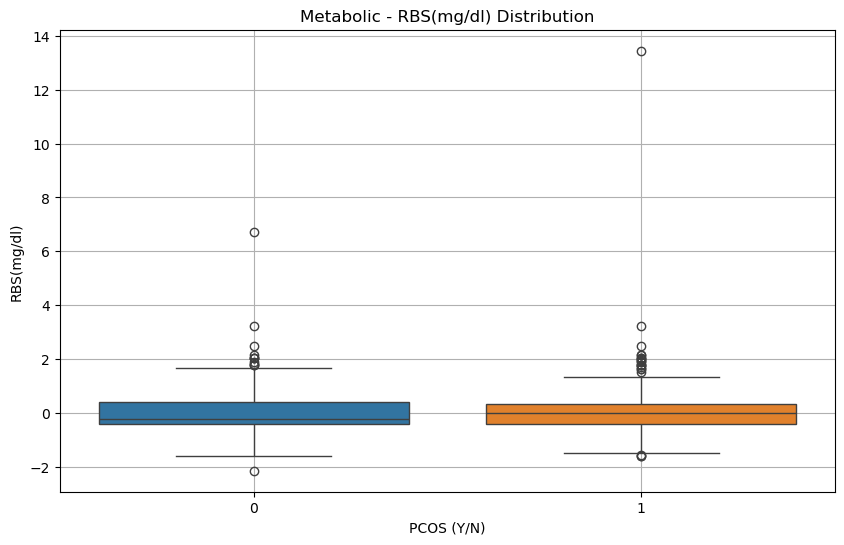

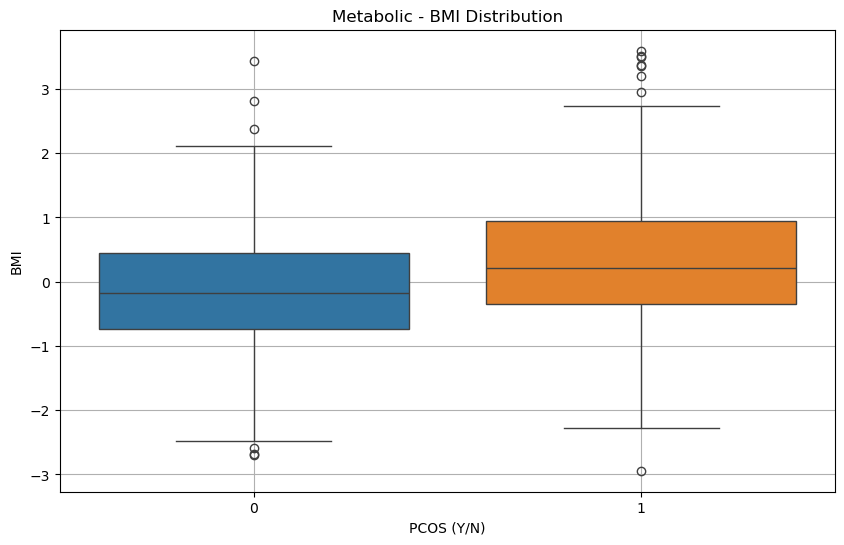

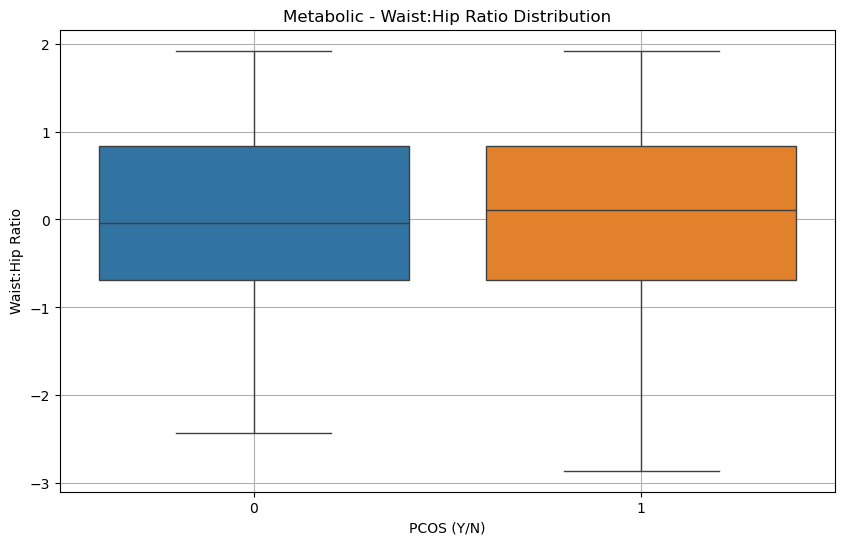

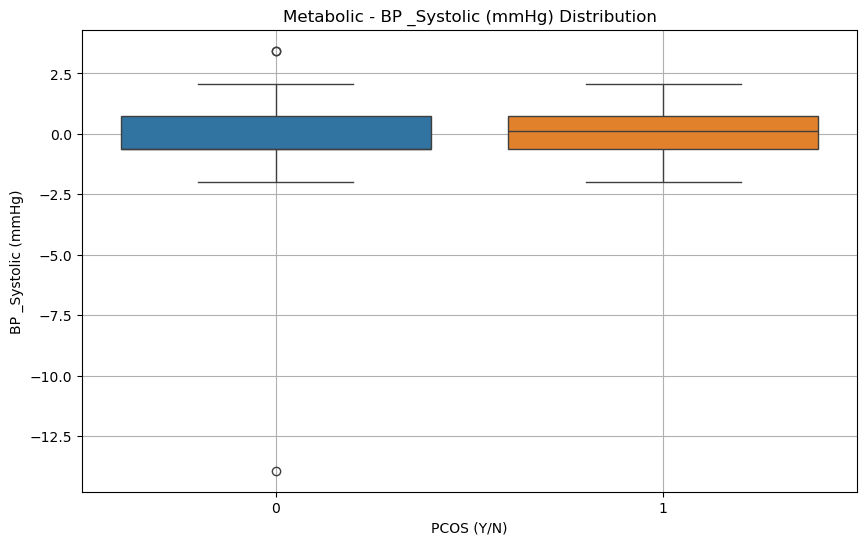

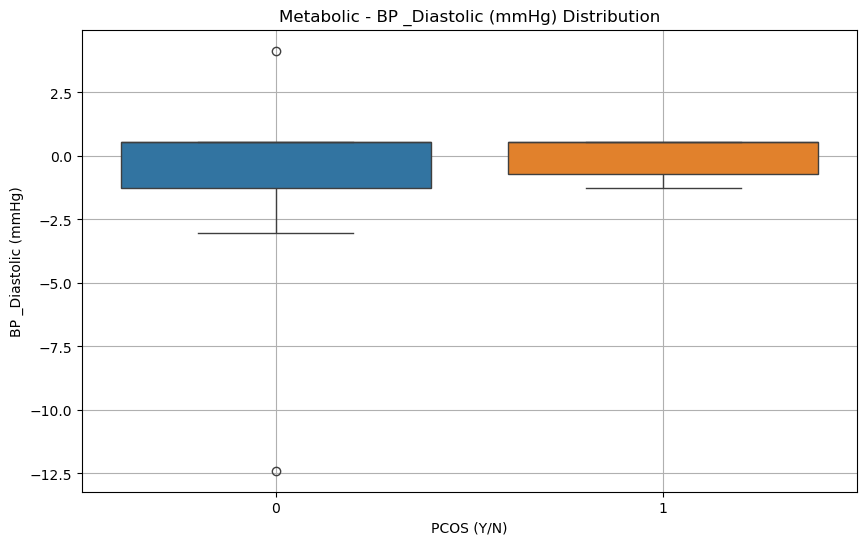

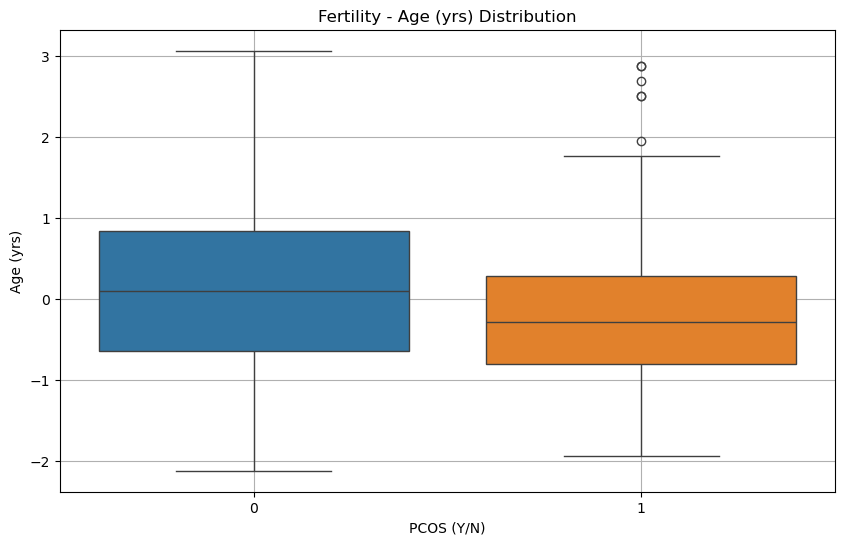

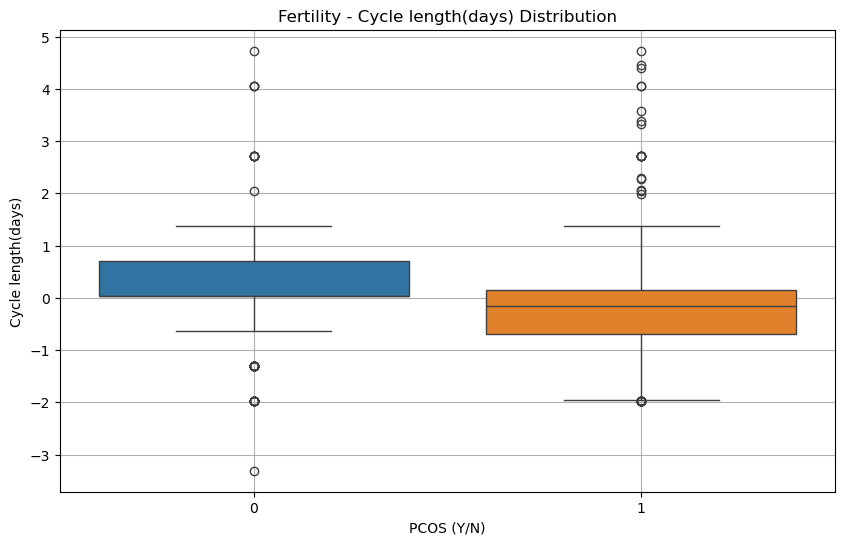

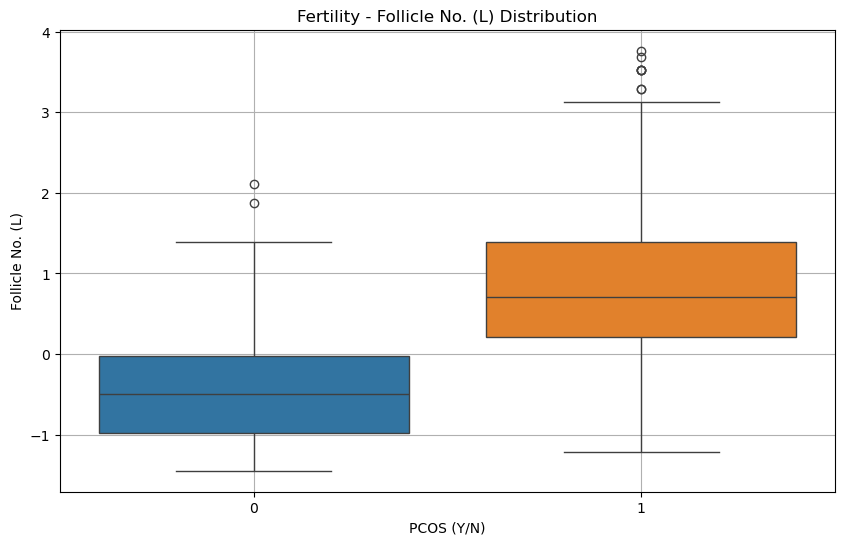

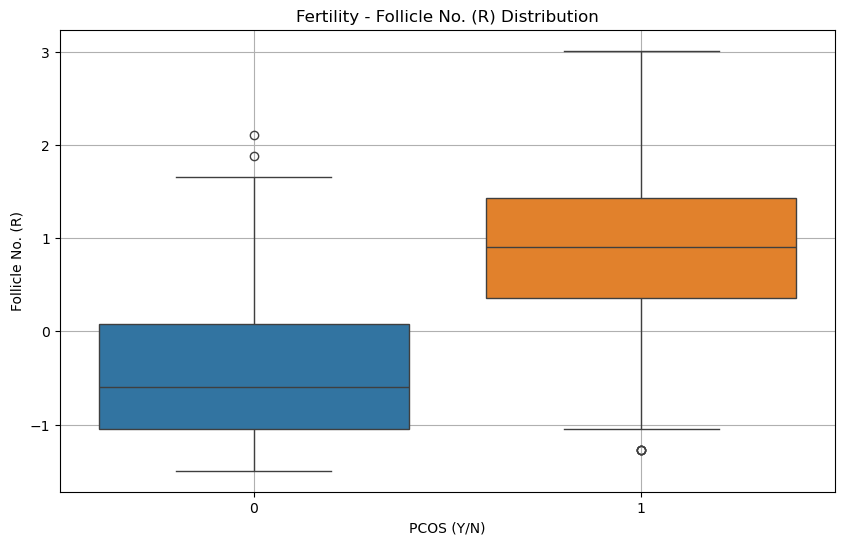

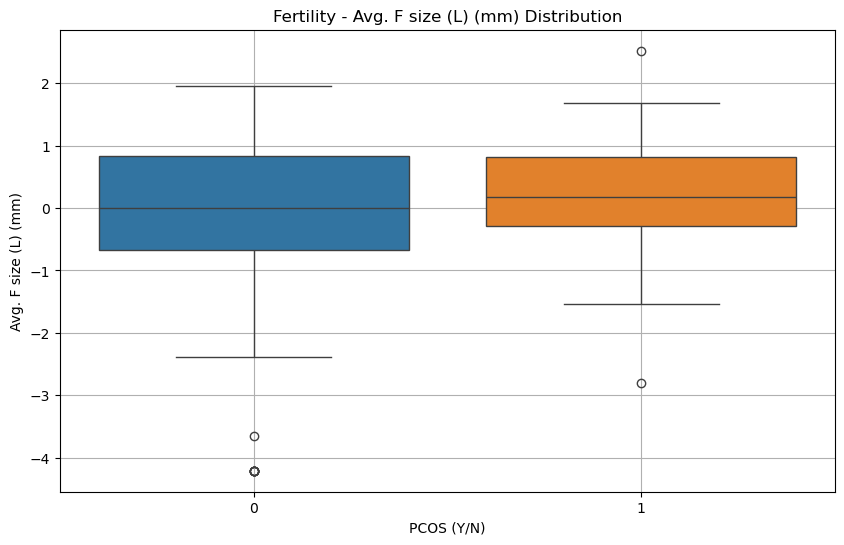

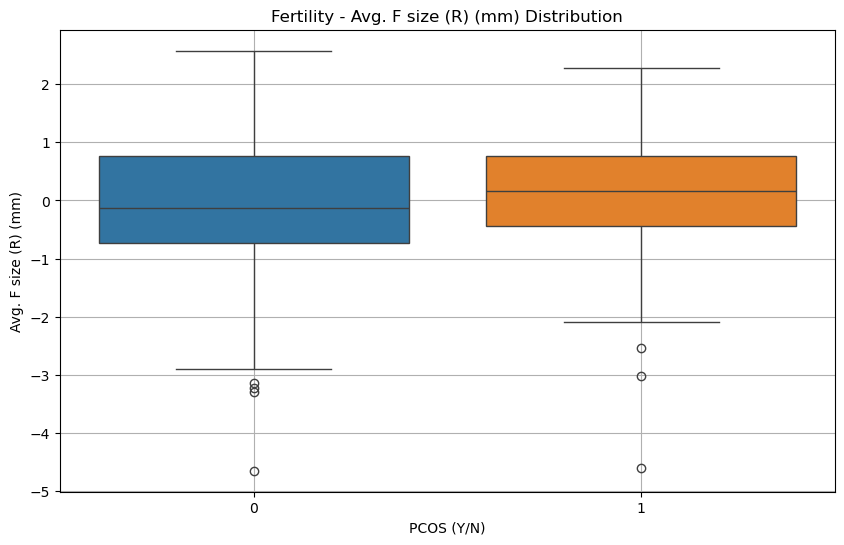

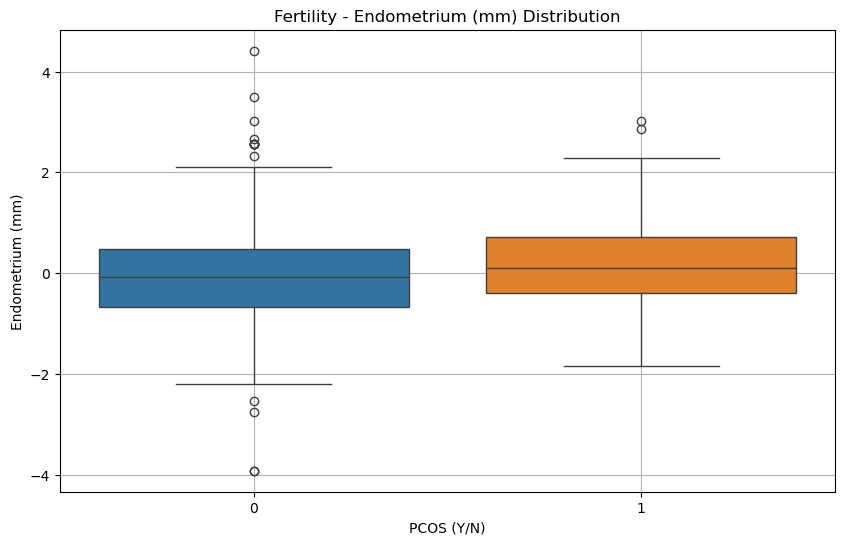

In [30]:
for title, subset in subsets.items():
    # Plot numeric columns as box plots
    for col in numeric_columns:
        if col in subset.columns and not subset[subset['PCOS (Y/N)'] == 0][col].empty:
            plt.figure(figsize=(10, 6))
            sns.boxplot(data=subset, x='PCOS (Y/N)', y=col, hue = 'PCOS (Y/N)', legend=False)
            plt.title(f'{title} - {col} Distribution')
            plt.xlabel('PCOS (Y/N)')
            plt.ylabel(col)
            plt.grid()
            plt.show()

### Future Steps:

- Create a regression model of highly correlated variables and create an interactive nomogram that allows users to alter variables and view what the risk assessment is with PCOS.
- I ran into trouble trying to impute 4 random empty values in the entiredata. Due to how many variables there are, that could be the reason why visualizations after SMOTE + imputation did not improve. As class continues throughout the semester, venture through more imputation methods we may be introduced to.